# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Prepare these arrays for stopword-checking.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            lemmas = substitution.source.lemmas[dslice]
            tokens = substitution.source.tokens[dslice]
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token) in enumerate(zip(words, lemmas, tokens)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': substitution.tags[0],
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 71288 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 71288) |            | Elapsed Time: 0:00:03 ETA:  3 days, 5:27:45

  0% (  128 of 71288) |                    | Elapsed Time: 0:00:04 ETA:  0:09:18

  0% (  206 of 71288) |                    | Elapsed Time: 0:00:05 ETA:  0:11:31

  0% (  318 of 71288) |                    | Elapsed Time: 0:00:06 ETA:  0:11:09

  0% (  431 of 71288) |                    | Elapsed Time: 0:00:07 ETA:  0:10:58

  0% (  542 of 71288) |                    | Elapsed Time: 0:00:08 ETA:  0:10:52

  0% (  658 of 71288) |                    | Elapsed Time: 0:00:09 ETA:  0:10:43

  1% (  770 of 71288) |                    | Elapsed Time: 0:00:10 ETA:  0:10:40

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:11 ETA:  0:10:32

  1% ( 1012 of 71288) |                    | Elapsed Time: 0:00:12 ETA:  0:10:35

  1% ( 1134 of 71288) |                    | Elapsed Time: 0:00:13 ETA:  0:10:04

  1% ( 1249 of 71288) |                    | Elapsed Time: 0:00:14 ETA:  0:10:01

  1% ( 1382 of 71288) |                    | Elapsed Time: 0:00:15 ETA:  0:09:46

  2% ( 1496 of 71288) |                    | Elapsed Time: 0:00:16 ETA:  0:09:43

  2% ( 1615 of 71288) |                    | Elapsed Time: 0:00:17 ETA:  0:09:41

  2% ( 1731 of 71288) |                    | Elapsed Time: 0:00:18 ETA:  0:09:37

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:19 ETA:  0:09:37

  2% ( 1891 of 71288) |                    | Elapsed Time: 0:00:20 ETA:  0:09:43

  2% ( 1994 of 71288) |                    | Elapsed Time: 0:00:21 ETA:  0:09:53

  2% ( 2107 of 71288) |                    | Elapsed Time: 0:00:22 ETA:  0:09:58

  3% ( 2182 of 71288) |                    | Elapsed Time: 0:00:23 ETA:  0:10:23

  3% ( 2292 of 71288) |                    | Elapsed Time: 0:00:24 ETA:  0:10:39

  3% ( 2404 of 71288) |                    | Elapsed Time: 0:00:25 ETA:  0:10:39

  3% ( 2518 of 71288) |                    | Elapsed Time: 0:00:26 ETA:  0:10:42

  3% ( 2629 of 71288) |                    | Elapsed Time: 0:00:27 ETA:  0:10:45

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:00:28 ETA:  0:11:01

  3% ( 2765 of 71288) |                    | Elapsed Time: 0:00:29 ETA:  0:11:14

  4% ( 2855 of 71288) |                    | Elapsed Time: 0:00:30 ETA:  0:11:23

  4% ( 2946 of 71288) |                    | Elapsed Time: 0:00:31 ETA:  0:11:41

  4% ( 3055 of 71288) |                    | Elapsed Time: 0:00:32 ETA:  0:11:12

  4% ( 3160 of 71288) |                    | Elapsed Time: 0:00:33 ETA:  0:11:15

  4% ( 3269 of 71288) |                    | Elapsed Time: 0:00:34 ETA:  0:11:16

  4% ( 3378 of 71288) |                    | Elapsed Time: 0:00:35 ETA:  0:11:20

  4% ( 3494 of 71288) |                    | Elapsed Time: 0:00:36 ETA:  0:11:15

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:00:36 ETA:  0:10:52

  5% ( 3690 of 71288) |#                   | Elapsed Time: 0:00:37 ETA:  0:10:25

  5% ( 3814 of 71288) |#                   | Elapsed Time: 0:00:38 ETA:  0:10:01

  5% ( 3941 of 71288) |#                   | Elapsed Time: 0:00:39 ETA:  0:09:37

  5% ( 4068 of 71288) |#                   | Elapsed Time: 0:00:40 ETA:  0:09:25

  5% ( 4195 of 71288) |#                   | Elapsed Time: 0:00:41 ETA:  0:09:11

  6% ( 4322 of 71288) |#                   | Elapsed Time: 0:00:42 ETA:  0:09:00

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:00:43 ETA:  0:08:43

  6% ( 4568 of 71288) |#                   | Elapsed Time: 0:00:44 ETA:  0:08:50

  6% ( 4667 of 71288) |#                   | Elapsed Time: 0:00:46 ETA:  0:09:26

  6% ( 4780 of 71288) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:31

  6% ( 4892 of 71288) |#                   | Elapsed Time: 0:00:48 ETA:  0:09:40

  7% ( 5005 of 71288) |#                   | Elapsed Time: 0:00:49 ETA:  0:09:48

  7% ( 5117 of 71288) |#                   | Elapsed Time: 0:00:50 ETA:  0:09:58

  7% ( 5232 of 71288) |#                   | Elapsed Time: 0:00:51 ETA:  0:10:05

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:00:52 ETA:  0:10:22

  7% ( 5422 of 71288) |#                   | Elapsed Time: 0:00:53 ETA:  0:10:51

  7% ( 5516 of 71288) |#                   | Elapsed Time: 0:00:54 ETA:  0:10:29

  7% ( 5618 of 71288) |#                   | Elapsed Time: 0:00:55 ETA:  0:10:37

  7% ( 5702 of 71288) |#                   | Elapsed Time: 0:00:56 ETA:  0:11:00

  8% ( 5811 of 71288) |#                   | Elapsed Time: 0:00:57 ETA:  0:11:02

  8% ( 5944 of 71288) |#                   | Elapsed Time: 0:00:58 ETA:  0:10:43

  8% ( 6066 of 71288) |#                   | Elapsed Time: 0:00:59 ETA:  0:10:37

  8% ( 6176 of 71288) |#                   | Elapsed Time: 0:01:00 ETA:  0:10:31

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:00 ETA:  0:10:28

  8% ( 6345 of 71288) |#                   | Elapsed Time: 0:01:01 ETA:  0:10:02

  9% ( 6453 of 71288) |#                   | Elapsed Time: 0:01:02 ETA:  0:09:52

  9% ( 6559 of 71288) |#                   | Elapsed Time: 0:01:03 ETA:  0:09:47

  9% ( 6655 of 71288) |#                   | Elapsed Time: 0:01:04 ETA:  0:09:39

  9% ( 6749 of 71288) |#                   | Elapsed Time: 0:01:05 ETA:  0:09:48

  9% ( 6843 of 71288) |#                   | Elapsed Time: 0:01:06 ETA:  0:10:15

  9% ( 6967 of 71288) |#                   | Elapsed Time: 0:01:07 ETA:  0:10:12

  9% ( 7091 of 71288) |#                   | Elapsed Time: 0:01:08 ETA:  0:10:01

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:09 ETA:  0:10:01

 10% ( 7237 of 71288) |##                  | Elapsed Time: 0:01:10 ETA:  0:09:59

 10% ( 7344 of 71288) |##                  | Elapsed Time: 0:01:11 ETA:  0:09:59

 10% ( 7447 of 71288) |##                  | Elapsed Time: 0:01:12 ETA:  0:10:34

 10% ( 7558 of 71288) |##                  | Elapsed Time: 0:01:13 ETA:  0:10:21

 10% ( 7669 of 71288) |##                  | Elapsed Time: 0:01:14 ETA:  0:10:07

 10% ( 7780 of 71288) |##                  | Elapsed Time: 0:01:15 ETA:  0:09:53

 11% ( 7891 of 71288) |##                  | Elapsed Time: 0:01:16 ETA:  0:10:02

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:01:17 ETA:  0:10:10

 11% ( 8131 of 71288) |##                  | Elapsed Time: 0:01:18 ETA:  0:10:07

 11% ( 8243 of 71288) |##                  | Elapsed Time: 0:01:19 ETA:  0:10:02

 11% ( 8350 of 71288) |##                  | Elapsed Time: 0:01:20 ETA:  0:09:25

 11% ( 8462 of 71288) |##                  | Elapsed Time: 0:01:21 ETA:  0:09:23

 12% ( 8573 of 71288) |##                  | Elapsed Time: 0:01:22 ETA:  0:09:22

 12% ( 8685 of 71288) |##                  | Elapsed Time: 0:01:23 ETA:  0:09:20

 12% ( 8796 of 71288) |##                  | Elapsed Time: 0:01:24 ETA:  0:09:19

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:01:25 ETA:  0:09:20

 12% ( 9029 of 71288) |##                  | Elapsed Time: 0:01:26 ETA:  0:09:15

 12% ( 9149 of 71288) |##                  | Elapsed Time: 0:01:27 ETA:  0:09:08

 12% ( 9267 of 71288) |##                  | Elapsed Time: 0:01:28 ETA:  0:09:00

 13% ( 9385 of 71288) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:54

 13% ( 9500 of 71288) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:51

 13% ( 9620 of 71288) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:45

 13% ( 9740 of 71288) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:37

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:33

 13% ( 9921 of 71288) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:31

 14% (10033 of 71288) |##                  | Elapsed Time: 0:01:35 ETA:  0:08:33

 14% (10146 of 71288) |##                  | Elapsed Time: 0:01:36 ETA:  0:08:36

 14% (10269 of 71288) |##                  | Elapsed Time: 0:01:37 ETA:  0:08:31

 14% (10396 of 71288) |##                  | Elapsed Time: 0:01:38 ETA:  0:08:25

 14% (10522 of 71288) |##                  | Elapsed Time: 0:01:39 ETA:  0:08:18

 14% (10646 of 71288) |##                  | Elapsed Time: 0:01:40 ETA:  0:08:14

 15% (10694 of 71288) |###                 | Elapsed Time: 0:01:40 ETA:  0:08:17

 15% (10802 of 71288) |###                 | Elapsed Time: 0:01:41 ETA:  0:08:22

 15% (10909 of 71288) |###                 | Elapsed Time: 0:01:42 ETA:  0:08:28

 15% (11015 of 71288) |###                 | Elapsed Time: 0:01:43 ETA:  0:08:31

 15% (11121 of 71288) |###                 | Elapsed Time: 0:01:44 ETA:  0:08:34

 15% (11226 of 71288) |###                 | Elapsed Time: 0:01:45 ETA:  0:08:45

 15% (11333 of 71288) |###                 | Elapsed Time: 0:01:46 ETA:  0:08:58

 15% (11377 of 71288) |###                 | Elapsed Time: 0:01:47 ETA:  0:09:59

 16% (11486 of 71288) |###                 | Elapsed Time: 0:01:48 ETA:  0:10:11

 16% (11585 of 71288) |###                 | Elapsed Time: 0:01:49 ETA:  0:10:03

 16% (11701 of 71288) |###                 | Elapsed Time: 0:01:50 ETA:  0:09:56

 16% (11819 of 71288) |###                 | Elapsed Time: 0:01:51 ETA:  0:09:46

 16% (11936 of 71288) |###                 | Elapsed Time: 0:01:52 ETA:  0:09:37

 16% (12051 of 71288) |###                 | Elapsed Time: 0:01:53 ETA:  0:09:29

 17% (12167 of 71288) |###                 | Elapsed Time: 0:01:54 ETA:  0:09:20

 17% (12281 of 71288) |###                 | Elapsed Time: 0:01:55 ETA:  0:09:14

 17% (12398 of 71288) |###                 | Elapsed Time: 0:01:56 ETA:  0:08:25

 17% (12476 of 71288) |###                 | Elapsed Time: 0:01:57 ETA:  0:08:17

 17% (12594 of 71288) |###                 | Elapsed Time: 0:01:58 ETA:  0:08:13

 17% (12712 of 71288) |###                 | Elapsed Time: 0:01:59 ETA:  0:08:11

 18% (12834 of 71288) |###                 | Elapsed Time: 0:02:00 ETA:  0:08:07

 18% (12953 of 71288) |###                 | Elapsed Time: 0:02:01 ETA:  0:08:05

 18% (13072 of 71288) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:02

 18% (13194 of 71288) |###                 | Elapsed Time: 0:02:03 ETA:  0:07:58

 18% (13311 of 71288) |###                 | Elapsed Time: 0:02:04 ETA:  0:07:56

 18% (13367 of 71288) |###                 | Elapsed Time: 0:02:04 ETA:  0:07:55

 18% (13482 of 71288) |###                 | Elapsed Time: 0:02:05 ETA:  0:07:57

 19% (13597 of 71288) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:58

 19% (13708 of 71288) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:02

 19% (13818 of 71288) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:09

 19% (13930 of 71288) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:12

 19% (14042 of 71288) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:16

 19% (14159 of 71288) |###                 | Elapsed Time: 0:02:12 ETA:  0:08:18

 20% (14258 of 71288) |####                | Elapsed Time: 0:02:12 ETA:  0:08:17

 20% (14376 of 71288) |####                | Elapsed Time: 0:02:13 ETA:  0:08:14

 20% (14494 of 71288) |####                | Elapsed Time: 0:02:14 ETA:  0:08:11

 20% (14609 of 71288) |####                | Elapsed Time: 0:02:15 ETA:  0:08:10

 20% (14725 of 71288) |####                | Elapsed Time: 0:02:16 ETA:  0:08:05

 20% (14845 of 71288) |####                | Elapsed Time: 0:02:17 ETA:  0:07:58

 20% (14934 of 71288) |####                | Elapsed Time: 0:02:18 ETA:  0:08:11

 21% (15021 of 71288) |####                | Elapsed Time: 0:02:19 ETA:  0:08:26

 21% (15106 of 71288) |####                | Elapsed Time: 0:02:20 ETA:  0:08:47

 21% (15149 of 71288) |####                | Elapsed Time: 0:02:21 ETA:  0:09:02

 21% (15233 of 71288) |####                | Elapsed Time: 0:02:22 ETA:  0:09:28

 21% (15315 of 71288) |####                | Elapsed Time: 0:02:23 ETA:  0:09:58

 21% (15403 of 71288) |####                | Elapsed Time: 0:02:24 ETA:  0:10:23

 21% (15489 of 71288) |####                | Elapsed Time: 0:02:25 ETA:  0:10:53

 21% (15583 of 71288) |####                | Elapsed Time: 0:02:26 ETA:  0:11:20

 22% (15697 of 71288) |####                | Elapsed Time: 0:02:27 ETA:  0:10:52

 22% (15808 of 71288) |####                | Elapsed Time: 0:02:28 ETA:  0:10:26

 22% (15922 of 71288) |####                | Elapsed Time: 0:02:29 ETA:  0:09:57

 22% (15964 of 71288) |####                | Elapsed Time: 0:02:30 ETA:  0:10:45

 22% (16040 of 71288) |####                | Elapsed Time: 0:02:31 ETA:  0:10:29

 22% (16150 of 71288) |####                | Elapsed Time: 0:02:32 ETA:  0:10:02

 22% (16260 of 71288) |####                | Elapsed Time: 0:02:33 ETA:  0:09:41

 22% (16371 of 71288) |####                | Elapsed Time: 0:02:34 ETA:  0:09:19

 23% (16484 of 71288) |####                | Elapsed Time: 0:02:35 ETA:  0:09:03

 23% (16593 of 71288) |####                | Elapsed Time: 0:02:36 ETA:  0:09:05

 23% (16705 of 71288) |####                | Elapsed Time: 0:02:37 ETA:  0:09:04

 23% (16818 of 71288) |####                | Elapsed Time: 0:02:38 ETA:  0:09:04

 23% (16931 of 71288) |####                | Elapsed Time: 0:02:39 ETA:  0:08:06

 23% (17039 of 71288) |####                | Elapsed Time: 0:02:40 ETA:  0:08:03

 24% (17142 of 71288) |####                | Elapsed Time: 0:02:41 ETA:  0:08:06

 24% (17240 of 71288) |####                | Elapsed Time: 0:02:42 ETA:  0:08:14

 24% (17335 of 71288) |####                | Elapsed Time: 0:02:43 ETA:  0:08:24

 24% (17448 of 71288) |####                | Elapsed Time: 0:02:44 ETA:  0:08:23

 24% (17573 of 71288) |####                | Elapsed Time: 0:02:45 ETA:  0:08:11

 24% (17688 of 71288) |####                | Elapsed Time: 0:02:46 ETA:  0:08:08

 24% (17785 of 71288) |####                | Elapsed Time: 0:02:47 ETA:  0:08:18

 25% (17823 of 71288) |#####               | Elapsed Time: 0:02:47 ETA:  0:08:27

 25% (17948 of 71288) |#####               | Elapsed Time: 0:02:48 ETA:  0:08:14

 25% (18068 of 71288) |#####               | Elapsed Time: 0:02:49 ETA:  0:08:01

 25% (18190 of 71288) |#####               | Elapsed Time: 0:02:50 ETA:  0:07:43

 25% (18309 of 71288) |#####               | Elapsed Time: 0:02:51 ETA:  0:07:27

 25% (18406 of 71288) |#####               | Elapsed Time: 0:02:52 ETA:  0:07:36

 25% (18510 of 71288) |#####               | Elapsed Time: 0:02:53 ETA:  0:07:50

 26% (18596 of 71288) |#####               | Elapsed Time: 0:02:54 ETA:  0:08:10

 26% (18714 of 71288) |#####               | Elapsed Time: 0:02:55 ETA:  0:07:52

 26% (18821 of 71288) |#####               | Elapsed Time: 0:02:56 ETA:  0:08:04

 26% (18920 of 71288) |#####               | Elapsed Time: 0:02:57 ETA:  0:08:19

 26% (19047 of 71288) |#####               | Elapsed Time: 0:02:58 ETA:  0:08:14

 26% (19177 of 71288) |#####               | Elapsed Time: 0:02:59 ETA:  0:08:04

 27% (19296 of 71288) |#####               | Elapsed Time: 0:03:00 ETA:  0:07:46

 27% (19409 of 71288) |#####               | Elapsed Time: 0:03:01 ETA:  0:07:39

 27% (19525 of 71288) |#####               | Elapsed Time: 0:03:02 ETA:  0:07:17

 27% (19605 of 71288) |#####               | Elapsed Time: 0:03:03 ETA:  0:07:12

 27% (19724 of 71288) |#####               | Elapsed Time: 0:03:04 ETA:  0:07:09

 27% (19842 of 71288) |#####               | Elapsed Time: 0:03:05 ETA:  0:07:02

 27% (19958 of 71288) |#####               | Elapsed Time: 0:03:06 ETA:  0:06:51

 28% (20076 of 71288) |#####               | Elapsed Time: 0:03:07 ETA:  0:06:55

 28% (20203 of 71288) |#####               | Elapsed Time: 0:03:08 ETA:  0:06:56

 28% (20328 of 71288) |#####               | Elapsed Time: 0:03:09 ETA:  0:06:52

 28% (20451 of 71288) |#####               | Elapsed Time: 0:03:10 ETA:  0:06:45

 28% (20496 of 71288) |#####               | Elapsed Time: 0:03:10 ETA:  0:06:40

 28% (20622 of 71288) |#####               | Elapsed Time: 0:03:11 ETA:  0:06:35

 29% (20745 of 71288) |#####               | Elapsed Time: 0:03:12 ETA:  0:06:32

 29% (20871 of 71288) |#####               | Elapsed Time: 0:03:13 ETA:  0:06:26

 29% (21000 of 71288) |#####               | Elapsed Time: 0:03:14 ETA:  0:06:18

 29% (21123 of 71288) |#####               | Elapsed Time: 0:03:15 ETA:  0:06:14

 29% (21216 of 71288) |#####               | Elapsed Time: 0:03:16 ETA:  0:06:32

 29% (21245 of 71288) |#####               | Elapsed Time: 0:03:18 ETA:  0:07:42

 29% (21346 of 71288) |#####               | Elapsed Time: 0:03:19 ETA:  0:07:57

 30% (21387 of 71288) |######              | Elapsed Time: 0:03:19 ETA:  0:08:05

 30% (21494 of 71288) |######              | Elapsed Time: 0:03:20 ETA:  0:08:18

 30% (21596 of 71288) |######              | Elapsed Time: 0:03:21 ETA:  0:08:35

 30% (21719 of 71288) |######              | Elapsed Time: 0:03:22 ETA:  0:08:37

 30% (21844 of 71288) |######              | Elapsed Time: 0:03:23 ETA:  0:08:40

 30% (21965 of 71288) |######              | Elapsed Time: 0:03:24 ETA:  0:08:40

 30% (22093 of 71288) |######              | Elapsed Time: 0:03:25 ETA:  0:08:10

 31% (22218 of 71288) |######              | Elapsed Time: 0:03:26 ETA:  0:06:51

 31% (22278 of 71288) |######              | Elapsed Time: 0:03:27 ETA:  0:06:43

 31% (22386 of 71288) |######              | Elapsed Time: 0:03:28 ETA:  0:06:43

 31% (22497 of 71288) |######              | Elapsed Time: 0:03:29 ETA:  0:06:40

 31% (22599 of 71288) |######              | Elapsed Time: 0:03:30 ETA:  0:06:39

 31% (22699 of 71288) |######              | Elapsed Time: 0:03:31 ETA:  0:06:52

 31% (22798 of 71288) |######              | Elapsed Time: 0:03:32 ETA:  0:07:08

 32% (22912 of 71288) |######              | Elapsed Time: 0:03:33 ETA:  0:07:13

 32% (23032 of 71288) |######              | Elapsed Time: 0:03:34 ETA:  0:07:17

 32% (23137 of 71288) |######              | Elapsed Time: 0:03:35 ETA:  0:07:30

 32% (23169 of 71288) |######              | Elapsed Time: 0:03:35 ETA:  0:07:37

 32% (23260 of 71288) |######              | Elapsed Time: 0:03:36 ETA:  0:07:49

 32% (23372 of 71288) |######              | Elapsed Time: 0:03:37 ETA:  0:07:47

 32% (23482 of 71288) |######              | Elapsed Time: 0:03:38 ETA:  0:07:40

 33% (23588 of 71288) |######              | Elapsed Time: 0:03:39 ETA:  0:07:34

 33% (23694 of 71288) |######              | Elapsed Time: 0:03:40 ETA:  0:07:27

 33% (23804 of 71288) |######              | Elapsed Time: 0:03:41 ETA:  0:07:29

 33% (23919 of 71288) |######              | Elapsed Time: 0:03:42 ETA:  0:07:31

 33% (24036 of 71288) |######              | Elapsed Time: 0:03:43 ETA:  0:07:22

 33% (24060 of 71288) |######              | Elapsed Time: 0:03:43 ETA:  0:07:18

 33% (24176 of 71288) |######              | Elapsed Time: 0:03:44 ETA:  0:06:58

 34% (24309 of 71288) |######              | Elapsed Time: 0:03:45 ETA:  0:06:43

 34% (24433 of 71288) |######              | Elapsed Time: 0:03:46 ETA:  0:06:33

 34% (24561 of 71288) |######              | Elapsed Time: 0:03:47 ETA:  0:06:17

 34% (24685 of 71288) |######              | Elapsed Time: 0:03:48 ETA:  0:06:05

 34% (24811 of 71288) |######              | Elapsed Time: 0:03:49 ETA:  0:05:55

 34% (24920 of 71288) |######              | Elapsed Time: 0:03:50 ETA:  0:05:58

 35% (24951 of 71288) |#######             | Elapsed Time: 0:03:51 ETA:  0:06:01

 35% (25029 of 71288) |#######             | Elapsed Time: 0:03:52 ETA:  0:06:23

 35% (25129 of 71288) |#######             | Elapsed Time: 0:03:53 ETA:  0:06:33

 35% (25213 of 71288) |#######             | Elapsed Time: 0:03:54 ETA:  0:07:06

 35% (25316 of 71288) |#######             | Elapsed Time: 0:03:55 ETA:  0:07:21

 35% (25429 of 71288) |#######             | Elapsed Time: 0:03:56 ETA:  0:07:32

 35% (25554 of 71288) |#######             | Elapsed Time: 0:03:57 ETA:  0:07:30

 36% (25668 of 71288) |#######             | Elapsed Time: 0:03:58 ETA:  0:07:39

 36% (25771 of 71288) |#######             | Elapsed Time: 0:03:59 ETA:  0:07:43

 36% (25842 of 71288) |#######             | Elapsed Time: 0:03:59 ETA:  0:07:33

 36% (25929 of 71288) |#######             | Elapsed Time: 0:04:00 ETA:  0:07:25

 36% (26034 of 71288) |#######             | Elapsed Time: 0:04:01 ETA:  0:07:20

 36% (26154 of 71288) |#######             | Elapsed Time: 0:04:02 ETA:  0:06:53

 36% (26264 of 71288) |#######             | Elapsed Time: 0:04:03 ETA:  0:06:47

 36% (26366 of 71288) |#######             | Elapsed Time: 0:04:04 ETA:  0:06:54

 37% (26487 of 71288) |#######             | Elapsed Time: 0:04:05 ETA:  0:06:56

 37% (26607 of 71288) |#######             | Elapsed Time: 0:04:06 ETA:  0:06:51

 37% (26734 of 71288) |#######             | Elapsed Time: 0:04:07 ETA:  0:06:39

 37% (26855 of 71288) |#######             | Elapsed Time: 0:04:08 ETA:  0:06:15

 37% (26948 of 71288) |#######             | Elapsed Time: 0:04:09 ETA:  0:06:21

 37% (27031 of 71288) |#######             | Elapsed Time: 0:04:10 ETA:  0:06:47

 38% (27115 of 71288) |#######             | Elapsed Time: 0:04:11 ETA:  0:07:06

 38% (27215 of 71288) |#######             | Elapsed Time: 0:04:12 ETA:  0:07:06

 38% (27337 of 71288) |#######             | Elapsed Time: 0:04:13 ETA:  0:07:04

 38% (27447 of 71288) |#######             | Elapsed Time: 0:04:14 ETA:  0:07:11

 38% (27476 of 71288) |#######             | Elapsed Time: 0:04:16 ETA:  0:09:00

 38% (27588 of 71288) |#######             | Elapsed Time: 0:04:17 ETA:  0:08:40

 38% (27625 of 71288) |#######             | Elapsed Time: 0:04:17 ETA:  0:09:01

 38% (27735 of 71288) |#######             | Elapsed Time: 0:04:18 ETA:  0:08:43

 39% (27854 of 71288) |#######             | Elapsed Time: 0:04:19 ETA:  0:08:08

 39% (27982 of 71288) |#######             | Elapsed Time: 0:04:20 ETA:  0:07:29

 39% (28084 of 71288) |#######             | Elapsed Time: 0:04:21 ETA:  0:07:26

 39% (28175 of 71288) |#######             | Elapsed Time: 0:04:22 ETA:  0:07:51

 39% (28272 of 71288) |#######             | Elapsed Time: 0:04:23 ETA:  0:08:03

 39% (28364 of 71288) |#######             | Elapsed Time: 0:04:24 ETA:  0:06:46

 39% (28470 of 71288) |#######             | Elapsed Time: 0:04:25 ETA:  0:06:49

 40% (28516 of 71288) |########            | Elapsed Time: 0:04:25 ETA:  0:06:50

 40% (28619 of 71288) |########            | Elapsed Time: 0:04:26 ETA:  0:06:54

 40% (28714 of 71288) |########            | Elapsed Time: 0:04:27 ETA:  0:07:12

 40% (28821 of 71288) |########            | Elapsed Time: 0:04:28 ETA:  0:07:28

 40% (28927 of 71288) |########            | Elapsed Time: 0:04:29 ETA:  0:07:24

 40% (29035 of 71288) |########            | Elapsed Time: 0:04:30 ETA:  0:07:09

 40% (29140 of 71288) |########            | Elapsed Time: 0:04:31 ETA:  0:07:01

 41% (29249 of 71288) |########            | Elapsed Time: 0:04:32 ETA:  0:06:46

 41% (29348 of 71288) |########            | Elapsed Time: 0:04:33 ETA:  0:06:51

 41% (29407 of 71288) |########            | Elapsed Time: 0:04:34 ETA:  0:06:56

 41% (29507 of 71288) |########            | Elapsed Time: 0:04:35 ETA:  0:06:57

 41% (29606 of 71288) |########            | Elapsed Time: 0:04:36 ETA:  0:06:53

 41% (29731 of 71288) |########            | Elapsed Time: 0:04:37 ETA:  0:06:38

 41% (29864 of 71288) |########            | Elapsed Time: 0:04:38 ETA:  0:06:17

 42% (29979 of 71288) |########            | Elapsed Time: 0:04:39 ETA:  0:06:11

 42% (30100 of 71288) |########            | Elapsed Time: 0:04:40 ETA:  0:05:59

 42% (30219 of 71288) |########            | Elapsed Time: 0:04:41 ETA:  0:05:52

 42% (30298 of 71288) |########            | Elapsed Time: 0:04:42 ETA:  0:05:49

 42% (30389 of 71288) |########            | Elapsed Time: 0:04:43 ETA:  0:05:56

 42% (30487 of 71288) |########            | Elapsed Time: 0:04:44 ETA:  0:05:56

 42% (30586 of 71288) |########            | Elapsed Time: 0:04:45 ETA:  0:05:55

 43% (30713 of 71288) |########            | Elapsed Time: 0:04:46 ETA:  0:05:53

 43% (30836 of 71288) |########            | Elapsed Time: 0:04:47 ETA:  0:05:59

 43% (30956 of 71288) |########            | Elapsed Time: 0:04:48 ETA:  0:05:55

 43% (31082 of 71288) |########            | Elapsed Time: 0:04:49 ETA:  0:05:50

 43% (31189 of 71288) |########            | Elapsed Time: 0:04:50 ETA:  0:05:45

 43% (31306 of 71288) |########            | Elapsed Time: 0:04:51 ETA:  0:05:35

 44% (31424 of 71288) |########            | Elapsed Time: 0:04:52 ETA:  0:05:18

 44% (31542 of 71288) |########            | Elapsed Time: 0:04:53 ETA:  0:05:05

 44% (31669 of 71288) |########            | Elapsed Time: 0:04:54 ETA:  0:04:50

 44% (31780 of 71288) |########            | Elapsed Time: 0:04:55 ETA:  0:04:58

 44% (31905 of 71288) |########            | Elapsed Time: 0:04:56 ETA:  0:04:56

 44% (32027 of 71288) |########            | Elapsed Time: 0:04:57 ETA:  0:04:53

 45% (32080 of 71288) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:57

 45% (32205 of 71288) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:57

 45% (32296 of 71288) |#########           | Elapsed Time: 0:04:59 ETA:  0:05:11

 45% (32388 of 71288) |#########           | Elapsed Time: 0:05:00 ETA:  0:05:27

 45% (32480 of 71288) |#########           | Elapsed Time: 0:05:01 ETA:  0:05:44

 45% (32592 of 71288) |#########           | Elapsed Time: 0:05:02 ETA:  0:05:53

 45% (32703 of 71288) |#########           | Elapsed Time: 0:05:03 ETA:  0:05:52

 46% (32821 of 71288) |#########           | Elapsed Time: 0:05:04 ETA:  0:05:55

 46% (32936 of 71288) |#########           | Elapsed Time: 0:05:05 ETA:  0:06:00

 46% (32971 of 71288) |#########           | Elapsed Time: 0:05:06 ETA:  0:06:01

 46% (33089 of 71288) |#########           | Elapsed Time: 0:05:07 ETA:  0:06:05

 46% (33180 of 71288) |#########           | Elapsed Time: 0:05:08 ETA:  0:06:04

 46% (33297 of 71288) |#########           | Elapsed Time: 0:05:09 ETA:  0:05:44

 46% (33403 of 71288) |#########           | Elapsed Time: 0:05:10 ETA:  0:05:33

 47% (33506 of 71288) |#########           | Elapsed Time: 0:05:11 ETA:  0:05:38

 47% (33627 of 71288) |#########           | Elapsed Time: 0:05:12 ETA:  0:05:30

 47% (33749 of 71288) |#########           | Elapsed Time: 0:05:13 ETA:  0:05:27

 47% (33862 of 71288) |#########           | Elapsed Time: 0:05:14 ETA:  0:05:21

 47% (33977 of 71288) |#########           | Elapsed Time: 0:05:15 ETA:  0:05:20

 47% (34095 of 71288) |#########           | Elapsed Time: 0:05:16 ETA:  0:05:19

 47% (34173 of 71288) |#########           | Elapsed Time: 0:05:17 ETA:  0:05:26

 48% (34268 of 71288) |#########           | Elapsed Time: 0:05:18 ETA:  0:05:40

 48% (34393 of 71288) |#########           | Elapsed Time: 0:05:19 ETA:  0:05:27

 48% (34505 of 71288) |#########           | Elapsed Time: 0:05:20 ETA:  0:05:19

 48% (34603 of 71288) |#########           | Elapsed Time: 0:05:21 ETA:  0:05:33

 48% (34670 of 71288) |#########           | Elapsed Time: 0:05:22 ETA:  0:06:12

 48% (34730 of 71288) |#########           | Elapsed Time: 0:05:23 ETA:  0:07:01

 48% (34753 of 71288) |#########           | Elapsed Time: 0:05:23 ETA:  0:07:29

 48% (34831 of 71288) |#########           | Elapsed Time: 0:05:24 ETA:  0:08:11

 49% (34956 of 71288) |#########           | Elapsed Time: 0:05:25 ETA:  0:07:21

 49% (35023 of 71288) |#########           | Elapsed Time: 0:05:27 ETA:  0:09:26

 49% (35097 of 71288) |#########           | Elapsed Time: 0:05:28 ETA:  0:10:29

 49% (35199 of 71288) |#########           | Elapsed Time: 0:05:29 ETA:  0:10:42

 49% (35306 of 71288) |#########           | Elapsed Time: 0:05:30 ETA:  0:10:29

 49% (35413 of 71288) |#########           | Elapsed Time: 0:05:31 ETA:  0:09:35

 49% (35523 of 71288) |#########           | Elapsed Time: 0:05:32 ETA:  0:08:36

 49% (35620 of 71288) |#########           | Elapsed Time: 0:05:33 ETA:  0:08:15

 50% (35645 of 71288) |##########          | Elapsed Time: 0:05:33 ETA:  0:08:06

 50% (35740 of 71288) |##########          | Elapsed Time: 0:05:34 ETA:  0:08:36

 50% (35858 of 71288) |##########          | Elapsed Time: 0:05:35 ETA:  0:06:13

 50% (35974 of 71288) |##########          | Elapsed Time: 0:05:36 ETA:  0:05:38

 50% (36101 of 71288) |##########          | Elapsed Time: 0:05:37 ETA:  0:05:19

 50% (36226 of 71288) |##########          | Elapsed Time: 0:05:38 ETA:  0:05:05

 51% (36358 of 71288) |##########          | Elapsed Time: 0:05:39 ETA:  0:04:47

 51% (36491 of 71288) |##########          | Elapsed Time: 0:05:40 ETA:  0:04:31

 51% (36536 of 71288) |##########          | Elapsed Time: 0:05:41 ETA:  0:04:14

 51% (36649 of 71288) |##########          | Elapsed Time: 0:05:42 ETA:  0:04:12

 51% (36768 of 71288) |##########          | Elapsed Time: 0:05:43 ETA:  0:03:58

 51% (36890 of 71288) |##########          | Elapsed Time: 0:05:44 ETA:  0:03:54

 51% (37011 of 71288) |##########          | Elapsed Time: 0:05:45 ETA:  0:03:51

 52% (37126 of 71288) |##########          | Elapsed Time: 0:05:46 ETA:  0:03:57

 52% (37239 of 71288) |##########          | Elapsed Time: 0:05:47 ETA:  0:04:03

 52% (37367 of 71288) |##########          | Elapsed Time: 0:05:48 ETA:  0:04:04

 52% (37427 of 71288) |##########          | Elapsed Time: 0:05:48 ETA:  0:04:09

 52% (37549 of 71288) |##########          | Elapsed Time: 0:05:49 ETA:  0:04:09

 52% (37668 of 71288) |##########          | Elapsed Time: 0:05:50 ETA:  0:04:04

 53% (37786 of 71288) |##########          | Elapsed Time: 0:05:51 ETA:  0:04:04

 53% (37909 of 71288) |##########          | Elapsed Time: 0:05:52 ETA:  0:04:02

 53% (38000 of 71288) |##########          | Elapsed Time: 0:05:53 ETA:  0:04:20

 53% (38093 of 71288) |##########          | Elapsed Time: 0:05:54 ETA:  0:04:32

 53% (38205 of 71288) |##########          | Elapsed Time: 0:05:55 ETA:  0:04:32

 53% (38318 of 71288) |##########          | Elapsed Time: 0:05:56 ETA:  0:04:58

 53% (38429 of 71288) |##########          | Elapsed Time: 0:05:57 ETA:  0:05:05

 54% (38552 of 71288) |##########          | Elapsed Time: 0:05:58 ETA:  0:05:02

 54% (38675 of 71288) |##########          | Elapsed Time: 0:05:59 ETA:  0:04:56

 54% (38770 of 71288) |##########          | Elapsed Time: 0:06:00 ETA:  0:05:17

 54% (38857 of 71288) |##########          | Elapsed Time: 0:06:01 ETA:  0:05:19

 54% (38955 of 71288) |##########          | Elapsed Time: 0:06:02 ETA:  0:05:14

 54% (39056 of 71288) |##########          | Elapsed Time: 0:06:03 ETA:  0:05:22

 54% (39158 of 71288) |##########          | Elapsed Time: 0:06:04 ETA:  0:05:17

 55% (39209 of 71288) |###########         | Elapsed Time: 0:06:05 ETA:  0:05:14

 55% (39327 of 71288) |###########         | Elapsed Time: 0:06:06 ETA:  0:05:08

 55% (39451 of 71288) |###########         | Elapsed Time: 0:06:07 ETA:  0:05:06

 55% (39557 of 71288) |###########         | Elapsed Time: 0:06:08 ETA:  0:05:18

 55% (39657 of 71288) |###########         | Elapsed Time: 0:06:09 ETA:  0:05:13

 55% (39771 of 71288) |###########         | Elapsed Time: 0:06:10 ETA:  0:04:50

 55% (39883 of 71288) |###########         | Elapsed Time: 0:06:11 ETA:  0:04:40

 56% (39998 of 71288) |###########         | Elapsed Time: 0:06:12 ETA:  0:04:29

 56% (40100 of 71288) |###########         | Elapsed Time: 0:06:13 ETA:  0:04:26

 56% (40212 of 71288) |###########         | Elapsed Time: 0:06:14 ETA:  0:04:25

 56% (40342 of 71288) |###########         | Elapsed Time: 0:06:15 ETA:  0:04:16

 56% (40426 of 71288) |###########         | Elapsed Time: 0:06:16 ETA:  0:04:42

 56% (40518 of 71288) |###########         | Elapsed Time: 0:06:17 ETA:  0:04:51

 56% (40623 of 71288) |###########         | Elapsed Time: 0:06:18 ETA:  0:04:47

 57% (40739 of 71288) |###########         | Elapsed Time: 0:06:19 ETA:  0:04:45

 57% (40864 of 71288) |###########         | Elapsed Time: 0:06:20 ETA:  0:04:35

 57% (40991 of 71288) |###########         | Elapsed Time: 0:06:21 ETA:  0:04:25

 57% (41086 of 71288) |###########         | Elapsed Time: 0:06:22 ETA:  0:04:37

 57% (41189 of 71288) |###########         | Elapsed Time: 0:06:23 ETA:  0:04:57

 57% (41308 of 71288) |###########         | Elapsed Time: 0:06:24 ETA:  0:04:28

 58% (41431 of 71288) |###########         | Elapsed Time: 0:06:25 ETA:  0:04:04

 58% (41546 of 71288) |###########         | Elapsed Time: 0:06:26 ETA:  0:03:56

 58% (41667 of 71288) |###########         | Elapsed Time: 0:06:27 ETA:  0:03:52

 58% (41785 of 71288) |###########         | Elapsed Time: 0:06:28 ETA:  0:03:56

 58% (41882 of 71288) |###########         | Elapsed Time: 0:06:29 ETA:  0:04:08

 58% (41983 of 71288) |###########         | Elapsed Time: 0:06:30 ETA:  0:04:15

 59% (42093 of 71288) |###########         | Elapsed Time: 0:06:31 ETA:  0:04:03

 59% (42212 of 71288) |###########         | Elapsed Time: 0:06:32 ETA:  0:03:52

 59% (42314 of 71288) |###########         | Elapsed Time: 0:06:33 ETA:  0:04:02

 59% (42427 of 71288) |###########         | Elapsed Time: 0:06:34 ETA:  0:04:08

 59% (42554 of 71288) |###########         | Elapsed Time: 0:06:35 ETA:  0:04:00

 59% (42677 of 71288) |###########         | Elapsed Time: 0:06:36 ETA:  0:03:57

 60% (42773 of 71288) |############        | Elapsed Time: 0:06:37 ETA:  0:03:53

 60% (42901 of 71288) |############        | Elapsed Time: 0:06:38 ETA:  0:03:37

 60% (43023 of 71288) |############        | Elapsed Time: 0:06:39 ETA:  0:03:24

 60% (43148 of 71288) |############        | Elapsed Time: 0:06:40 ETA:  0:03:14

 60% (43277 of 71288) |############        | Elapsed Time: 0:06:41 ETA:  0:03:07

 60% (43406 of 71288) |############        | Elapsed Time: 0:06:42 ETA:  0:02:51

 61% (43508 of 71288) |############        | Elapsed Time: 0:06:43 ETA:  0:02:56

 61% (43605 of 71288) |############        | Elapsed Time: 0:06:44 ETA:  0:03:12

 61% (43664 of 71288) |############        | Elapsed Time: 0:06:44 ETA:  0:03:19

 61% (43779 of 71288) |############        | Elapsed Time: 0:06:45 ETA:  0:03:23

 61% (43875 of 71288) |############        | Elapsed Time: 0:06:46 ETA:  0:03:42

 61% (44004 of 71288) |############        | Elapsed Time: 0:06:47 ETA:  0:03:37

 61% (44132 of 71288) |############        | Elapsed Time: 0:06:48 ETA:  0:03:34

 62% (44250 of 71288) |############        | Elapsed Time: 0:06:49 ETA:  0:03:40

 62% (44372 of 71288) |############        | Elapsed Time: 0:06:50 ETA:  0:03:44

 62% (44492 of 71288) |############        | Elapsed Time: 0:06:51 ETA:  0:03:31

 62% (44511 of 71288) |############        | Elapsed Time: 0:06:53 ETA:  0:05:16

 62% (44556 of 71288) |############        | Elapsed Time: 0:06:54 ETA:  0:05:15

 62% (44648 of 71288) |############        | Elapsed Time: 0:06:55 ETA:  0:05:34

 62% (44747 of 71288) |############        | Elapsed Time: 0:06:56 ETA:  0:05:31

 62% (44869 of 71288) |############        | Elapsed Time: 0:06:57 ETA:  0:05:35

 63% (44984 of 71288) |############        | Elapsed Time: 0:06:58 ETA:  0:05:45

 63% (45102 of 71288) |############        | Elapsed Time: 0:06:59 ETA:  0:05:44

 63% (45212 of 71288) |############        | Elapsed Time: 0:07:00 ETA:  0:05:54

 63% (45330 of 71288) |############        | Elapsed Time: 0:07:01 ETA:  0:05:55

 63% (45447 of 71288) |############        | Elapsed Time: 0:07:02 ETA:  0:03:54

 63% (45575 of 71288) |############        | Elapsed Time: 0:07:03 ETA:  0:03:27

 64% (45690 of 71288) |############        | Elapsed Time: 0:07:04 ETA:  0:03:15

 64% (45796 of 71288) |############        | Elapsed Time: 0:07:05 ETA:  0:03:26

 64% (45908 of 71288) |############        | Elapsed Time: 0:07:06 ETA:  0:03:27

 64% (46015 of 71288) |############        | Elapsed Time: 0:07:07 ETA:  0:03:34

 64% (46126 of 71288) |############        | Elapsed Time: 0:07:08 ETA:  0:03:32

 64% (46247 of 71288) |############        | Elapsed Time: 0:07:09 ETA:  0:03:29

 65% (46338 of 71288) |#############       | Elapsed Time: 0:07:09 ETA:  0:03:08

 65% (46467 of 71288) |#############       | Elapsed Time: 0:07:10 ETA:  0:03:00

 65% (46588 of 71288) |#############       | Elapsed Time: 0:07:11 ETA:  0:03:03

 65% (46707 of 71288) |#############       | Elapsed Time: 0:07:12 ETA:  0:03:00

 65% (46825 of 71288) |#############       | Elapsed Time: 0:07:13 ETA:  0:02:52

 65% (46956 of 71288) |#############       | Elapsed Time: 0:07:15 ETA:  0:02:39

 66% (47070 of 71288) |#############       | Elapsed Time: 0:07:16 ETA:  0:02:34

 66% (47182 of 71288) |#############       | Elapsed Time: 0:07:17 ETA:  0:02:32

 66% (47229 of 71288) |#############       | Elapsed Time: 0:07:17 ETA:  0:02:34

 66% (47348 of 71288) |#############       | Elapsed Time: 0:07:18 ETA:  0:02:37

 66% (47452 of 71288) |#############       | Elapsed Time: 0:07:19 ETA:  0:02:51

 66% (47568 of 71288) |#############       | Elapsed Time: 0:07:20 ETA:  0:02:54

 66% (47693 of 71288) |#############       | Elapsed Time: 0:07:21 ETA:  0:02:49

 67% (47816 of 71288) |#############       | Elapsed Time: 0:07:22 ETA:  0:02:44

 67% (47933 of 71288) |#############       | Elapsed Time: 0:07:23 ETA:  0:02:53

 67% (48032 of 71288) |#############       | Elapsed Time: 0:07:24 ETA:  0:03:01

 67% (48120 of 71288) |#############       | Elapsed Time: 0:07:25 ETA:  0:02:53

 67% (48227 of 71288) |#############       | Elapsed Time: 0:07:26 ETA:  0:02:58

 67% (48340 of 71288) |#############       | Elapsed Time: 0:07:27 ETA:  0:03:00

 67% (48459 of 71288) |#############       | Elapsed Time: 0:07:28 ETA:  0:02:50

 68% (48574 of 71288) |#############       | Elapsed Time: 0:07:29 ETA:  0:02:49

 68% (48683 of 71288) |#############       | Elapsed Time: 0:07:30 ETA:  0:02:58

 68% (48805 of 71288) |#############       | Elapsed Time: 0:07:31 ETA:  0:02:57

 68% (48934 of 71288) |#############       | Elapsed Time: 0:07:32 ETA:  0:02:48

 68% (49011 of 71288) |#############       | Elapsed Time: 0:07:32 ETA:  0:02:37

 68% (49125 of 71288) |#############       | Elapsed Time: 0:07:33 ETA:  0:02:42

 69% (49239 of 71288) |#############       | Elapsed Time: 0:07:34 ETA:  0:02:36

 69% (49368 of 71288) |#############       | Elapsed Time: 0:07:35 ETA:  0:02:26

 69% (49492 of 71288) |#############       | Elapsed Time: 0:07:36 ETA:  0:02:22

 69% (49594 of 71288) |#############       | Elapsed Time: 0:07:37 ETA:  0:02:30

 69% (49693 of 71288) |#############       | Elapsed Time: 0:07:38 ETA:  0:02:35

 69% (49815 of 71288) |#############       | Elapsed Time: 0:07:39 ETA:  0:02:34

 70% (49902 of 71288) |##############      | Elapsed Time: 0:07:40 ETA:  0:02:42

 70% (50025 of 71288) |##############      | Elapsed Time: 0:07:41 ETA:  0:02:37

 70% (50144 of 71288) |##############      | Elapsed Time: 0:07:42 ETA:  0:02:33

 70% (50251 of 71288) |##############      | Elapsed Time: 0:07:43 ETA:  0:02:37

 70% (50366 of 71288) |##############      | Elapsed Time: 0:07:44 ETA:  0:02:44

 70% (50479 of 71288) |##############      | Elapsed Time: 0:07:45 ETA:  0:02:50

 70% (50597 of 71288) |##############      | Elapsed Time: 0:07:46 ETA:  0:02:39

 71% (50711 of 71288) |##############      | Elapsed Time: 0:07:47 ETA:  0:02:28

 71% (50793 of 71288) |##############      | Elapsed Time: 0:07:48 ETA:  0:02:29

 71% (50902 of 71288) |##############      | Elapsed Time: 0:07:49 ETA:  0:02:31

 71% (51017 of 71288) |##############      | Elapsed Time: 0:07:50 ETA:  0:02:35

 71% (51128 of 71288) |##############      | Elapsed Time: 0:07:51 ETA:  0:02:40

 71% (51237 of 71288) |##############      | Elapsed Time: 0:07:52 ETA:  0:02:37

 72% (51369 of 71288) |##############      | Elapsed Time: 0:07:53 ETA:  0:02:25

 72% (51475 of 71288) |##############      | Elapsed Time: 0:07:54 ETA:  0:02:29

 72% (51590 of 71288) |##############      | Elapsed Time: 0:07:55 ETA:  0:02:30

 72% (51684 of 71288) |##############      | Elapsed Time: 0:07:56 ETA:  0:02:40

 72% (51801 of 71288) |##############      | Elapsed Time: 0:07:57 ETA:  0:02:41

 72% (51898 of 71288) |##############      | Elapsed Time: 0:07:58 ETA:  0:02:47

 72% (52022 of 71288) |##############      | Elapsed Time: 0:07:59 ETA:  0:02:40

 73% (52140 of 71288) |##############      | Elapsed Time: 0:08:00 ETA:  0:02:35

 73% (52252 of 71288) |##############      | Elapsed Time: 0:08:01 ETA:  0:02:32

 73% (52348 of 71288) |##############      | Elapsed Time: 0:08:02 ETA:  0:02:54

 73% (52472 of 71288) |##############      | Elapsed Time: 0:08:03 ETA:  0:02:41

 73% (52575 of 71288) |##############      | Elapsed Time: 0:08:04 ETA:  0:02:35

 73% (52656 of 71288) |##############      | Elapsed Time: 0:08:05 ETA:  0:02:45

 74% (52771 of 71288) |##############      | Elapsed Time: 0:08:06 ETA:  0:02:45

 74% (52875 of 71288) |##############      | Elapsed Time: 0:08:07 ETA:  0:02:40

 74% (52999 of 71288) |##############      | Elapsed Time: 0:08:08 ETA:  0:02:39

 74% (53121 of 71288) |##############      | Elapsed Time: 0:08:09 ETA:  0:02:35

 74% (53242 of 71288) |##############      | Elapsed Time: 0:08:10 ETA:  0:02:29

 74% (53352 of 71288) |##############      | Elapsed Time: 0:08:11 ETA:  0:02:19

 75% (53467 of 71288) |###############     | Elapsed Time: 0:08:12 ETA:  0:02:24

 75% (53587 of 71288) |###############     | Elapsed Time: 0:08:13 ETA:  0:02:23

 75% (53702 of 71288) |###############     | Elapsed Time: 0:08:14 ETA:  0:02:01

 75% (53811 of 71288) |###############     | Elapsed Time: 0:08:15 ETA:  0:02:04

 75% (53930 of 71288) |###############     | Elapsed Time: 0:08:16 ETA:  0:01:54

 75% (54058 of 71288) |###############     | Elapsed Time: 0:08:17 ETA:  0:01:50

 76% (54185 of 71288) |###############     | Elapsed Time: 0:08:18 ETA:  0:01:47

 76% (54298 of 71288) |###############     | Elapsed Time: 0:08:19 ETA:  0:01:50

 76% (54358 of 71288) |###############     | Elapsed Time: 0:08:19 ETA:  0:01:44

 76% (54479 of 71288) |###############     | Elapsed Time: 0:08:20 ETA:  0:01:39

 76% (54597 of 71288) |###############     | Elapsed Time: 0:08:21 ETA:  0:01:40

 76% (54698 of 71288) |###############     | Elapsed Time: 0:08:22 ETA:  0:01:48

 76% (54807 of 71288) |###############     | Elapsed Time: 0:08:23 ETA:  0:01:47

 77% (54928 of 71288) |###############     | Elapsed Time: 0:08:24 ETA:  0:01:45

 77% (55043 of 71288) |###############     | Elapsed Time: 0:08:25 ETA:  0:01:52

 77% (55161 of 71288) |###############     | Elapsed Time: 0:08:26 ETA:  0:01:57

 77% (55249 of 71288) |###############     | Elapsed Time: 0:08:27 ETA:  0:01:50

 77% (55356 of 71288) |###############     | Elapsed Time: 0:08:28 ETA:  0:01:56

 77% (55477 of 71288) |###############     | Elapsed Time: 0:08:29 ETA:  0:01:56

 77% (55589 of 71288) |###############     | Elapsed Time: 0:08:30 ETA:  0:01:58

 78% (55695 of 71288) |###############     | Elapsed Time: 0:08:31 ETA:  0:01:54

 78% (55810 of 71288) |###############     | Elapsed Time: 0:08:34 ETA:  0:03:54

 78% (55911 of 71288) |###############     | Elapsed Time: 0:08:35 ETA:  0:04:08

 78% (56023 of 71288) |###############     | Elapsed Time: 0:08:36 ETA:  0:04:10

 78% (56140 of 71288) |###############     | Elapsed Time: 0:08:37 ETA:  0:04:32

 78% (56244 of 71288) |###############     | Elapsed Time: 0:08:38 ETA:  0:04:33

 79% (56363 of 71288) |###############     | Elapsed Time: 0:08:39 ETA:  0:04:34

 79% (56474 of 71288) |###############     | Elapsed Time: 0:08:40 ETA:  0:04:33

 79% (56588 of 71288) |###############     | Elapsed Time: 0:08:41 ETA:  0:04:26

 79% (56690 of 71288) |###############     | Elapsed Time: 0:08:42 ETA:  0:02:12

 79% (56804 of 71288) |###############     | Elapsed Time: 0:08:43 ETA:  0:02:02

 79% (56905 of 71288) |###############     | Elapsed Time: 0:08:44 ETA:  0:02:09

 80% (57031 of 71288) |################    | Elapsed Time: 0:08:45 ETA:  0:02:09

 80% (57122 of 71288) |################    | Elapsed Time: 0:08:46 ETA:  0:02:18

 80% (57216 of 71288) |################    | Elapsed Time: 0:08:47 ETA:  0:02:37

 80% (57330 of 71288) |################    | Elapsed Time: 0:08:48 ETA:  0:02:34

 80% (57446 of 71288) |################    | Elapsed Time: 0:08:49 ETA:  0:02:31

 80% (57562 of 71288) |################    | Elapsed Time: 0:08:50 ETA:  0:02:19

 80% (57677 of 71288) |################    | Elapsed Time: 0:08:51 ETA:  0:02:16

 81% (57788 of 71288) |################    | Elapsed Time: 0:08:52 ETA:  0:02:08

 81% (57922 of 71288) |################    | Elapsed Time: 0:08:53 ETA:  0:02:03

 81% (58042 of 71288) |################    | Elapsed Time: 0:08:54 ETA:  0:01:42

 81% (58156 of 71288) |################    | Elapsed Time: 0:08:55 ETA:  0:01:27

 81% (58262 of 71288) |################    | Elapsed Time: 0:08:56 ETA:  0:01:31

 81% (58367 of 71288) |################    | Elapsed Time: 0:08:57 ETA:  0:01:37

 82% (58471 of 71288) |################    | Elapsed Time: 0:08:58 ETA:  0:01:44

 82% (58583 of 71288) |################    | Elapsed Time: 0:08:59 ETA:  0:01:46

 82% (58703 of 71288) |################    | Elapsed Time: 0:09:00 ETA:  0:01:38

 82% (58813 of 71288) |################    | Elapsed Time: 0:09:01 ETA:  0:01:36

 82% (58918 of 71288) |################    | Elapsed Time: 0:09:02 ETA:  0:01:41

 82% (59046 of 71288) |################    | Elapsed Time: 0:09:03 ETA:  0:01:35

 82% (59161 of 71288) |################    | Elapsed Time: 0:09:04 ETA:  0:01:33

 83% (59278 of 71288) |################    | Elapsed Time: 0:09:05 ETA:  0:01:25

 83% (59379 of 71288) |################    | Elapsed Time: 0:09:06 ETA:  0:01:27

 83% (59483 of 71288) |################    | Elapsed Time: 0:09:07 ETA:  0:01:25

 83% (59591 of 71288) |################    | Elapsed Time: 0:09:08 ETA:  0:01:27

 83% (59704 of 71288) |################    | Elapsed Time: 0:09:09 ETA:  0:01:28

 83% (59818 of 71288) |################    | Elapsed Time: 0:09:10 ETA:  0:01:27

 84% (59928 of 71288) |################    | Elapsed Time: 0:09:11 ETA:  0:01:23

 84% (60043 of 71288) |################    | Elapsed Time: 0:09:12 ETA:  0:01:30

 84% (60154 of 71288) |################    | Elapsed Time: 0:09:13 ETA:  0:01:32

 84% (60260 of 71288) |################    | Elapsed Time: 0:09:14 ETA:  0:01:38

 84% (60374 of 71288) |################    | Elapsed Time: 0:09:15 ETA:  0:01:29

 84% (60496 of 71288) |################    | Elapsed Time: 0:09:16 ETA:  0:01:17

 85% (60595 of 71288) |#################   | Elapsed Time: 0:09:17 ETA:  0:01:08

 85% (60694 of 71288) |#################   | Elapsed Time: 0:09:18 ETA:  0:01:19

 85% (60789 of 71288) |#################   | Elapsed Time: 0:09:19 ETA:  0:01:30

 85% (60895 of 71288) |#################   | Elapsed Time: 0:09:20 ETA:  0:01:32

 85% (61017 of 71288) |#################   | Elapsed Time: 0:09:21 ETA:  0:01:26

 85% (61134 of 71288) |#################   | Elapsed Time: 0:09:22 ETA:  0:01:22

 85% (61238 of 71288) |#################   | Elapsed Time: 0:09:23 ETA:  0:01:22

 86% (61358 of 71288) |#################   | Elapsed Time: 0:09:24 ETA:  0:01:17

 86% (61486 of 71288) |#################   | Elapsed Time: 0:09:25 ETA:  0:01:28

 86% (61592 of 71288) |#################   | Elapsed Time: 0:09:26 ETA:  0:01:23

 86% (61700 of 71288) |#################   | Elapsed Time: 0:09:27 ETA:  0:01:12

 86% (61814 of 71288) |#################   | Elapsed Time: 0:09:28 ETA:  0:01:06

 86% (61920 of 71288) |#################   | Elapsed Time: 0:09:29 ETA:  0:01:16

 87% (62037 of 71288) |#################   | Elapsed Time: 0:09:30 ETA:  0:01:14

 87% (62134 of 71288) |#################   | Elapsed Time: 0:09:31 ETA:  0:01:18

 87% (62247 of 71288) |#################   | Elapsed Time: 0:09:32 ETA:  0:01:22

 87% (62343 of 71288) |#################   | Elapsed Time: 0:09:33 ETA:  0:01:35

 87% (62378 of 71288) |#################   | Elapsed Time: 0:09:34 ETA:  0:01:36

 87% (62493 of 71288) |#################   | Elapsed Time: 0:09:35 ETA:  0:01:27

 87% (62608 of 71288) |#################   | Elapsed Time: 0:09:36 ETA:  0:01:21

 87% (62722 of 71288) |#################   | Elapsed Time: 0:09:37 ETA:  0:01:21

 88% (62811 of 71288) |#################   | Elapsed Time: 0:09:38 ETA:  0:01:33

 88% (62918 of 71288) |#################   | Elapsed Time: 0:09:39 ETA:  0:01:39

 88% (63028 of 71288) |#################   | Elapsed Time: 0:09:40 ETA:  0:01:29

 88% (63144 of 71288) |#################   | Elapsed Time: 0:09:41 ETA:  0:01:25

 88% (63269 of 71288) |#################   | Elapsed Time: 0:09:42 ETA:  0:01:11

 88% (63375 of 71288) |#################   | Elapsed Time: 0:09:43 ETA:  0:01:17

 89% (63498 of 71288) |#################   | Elapsed Time: 0:09:44 ETA:  0:01:10

 89% (63614 of 71288) |#################   | Elapsed Time: 0:09:45 ETA:  0:01:06

 89% (63729 of 71288) |#################   | Elapsed Time: 0:09:46 ETA:  0:00:47

 89% (63844 of 71288) |#################   | Elapsed Time: 0:09:47 ETA:  0:00:40

 89% (63954 of 71288) |#################   | Elapsed Time: 0:09:48 ETA:  0:00:39

 89% (64072 of 71288) |#################   | Elapsed Time: 0:09:49 ETA:  0:00:37

 90% (64160 of 71288) |##################  | Elapsed Time: 0:09:50 ETA:  0:00:34

 90% (64273 of 71288) |##################  | Elapsed Time: 0:09:51 ETA:  0:00:34

 90% (64387 of 71288) |##################  | Elapsed Time: 0:09:52 ETA:  0:00:28

 90% (64494 of 71288) |##################  | Elapsed Time: 0:09:53 ETA:  0:00:37

 90% (64619 of 71288) |##################  | Elapsed Time: 0:09:54 ETA:  0:00:31

 90% (64741 of 71288) |##################  | Elapsed Time: 0:09:55 ETA:  0:00:26

 90% (64852 of 71288) |##################  | Elapsed Time: 0:09:56 ETA:  0:00:27

 91% (64963 of 71288) |##################  | Elapsed Time: 0:09:57 ETA:  0:00:26

 91% (65051 of 71288) |##################  | Elapsed Time: 0:09:58 ETA:  0:00:29

 91% (65163 of 71288) |##################  | Elapsed Time: 0:09:59 ETA:  0:00:28

 91% (65272 of 71288) |##################  | Elapsed Time: 0:10:00 ETA:  0:00:30

 91% (65387 of 71288) |##################  | Elapsed Time: 0:10:01 ETA:  0:00:28

 91% (65496 of 71288) |##################  | Elapsed Time: 0:10:02 ETA:  0:00:26

 92% (65605 of 71288) |##################  | Elapsed Time: 0:10:03 ETA:  0:00:35

 92% (65710 of 71288) |##################  | Elapsed Time: 0:10:04 ETA:  0:00:45

 92% (65833 of 71288) |##################  | Elapsed Time: 0:10:05 ETA:  0:00:36

 92% (65942 of 71288) |##################  | Elapsed Time: 0:10:05 ETA:  0:00:26

 92% (66057 of 71288) |##################  | Elapsed Time: 0:10:06 ETA:  0:00:23

 92% (66167 of 71288) |##################  | Elapsed Time: 0:10:07 ETA:  0:00:24

 92% (66276 of 71288) |##################  | Elapsed Time: 0:10:08 ETA:  0:00:23

 93% (66379 of 71288) |##################  | Elapsed Time: 0:10:09 ETA:  0:00:30

 93% (66492 of 71288) |##################  | Elapsed Time: 0:10:10 ETA:  0:00:26

 93% (66581 of 71288) |##################  | Elapsed Time: 0:10:11 ETA:  0:00:38

 93% (66706 of 71288) |##################  | Elapsed Time: 0:10:12 ETA:  0:00:24

 93% (66833 of 71288) |##################  | Elapsed Time: 0:10:14 ETA:  0:00:40

 93% (66950 of 71288) |##################  | Elapsed Time: 0:10:15 ETA:  0:00:37

 94% (67058 of 71288) |##################  | Elapsed Time: 0:10:16 ETA:  0:00:38

 94% (67179 of 71288) |##################  | Elapsed Time: 0:10:17 ETA:  0:00:28

 94% (67292 of 71288) |##################  | Elapsed Time: 0:10:18 ETA:  0:00:20

 94% (67414 of 71288) |##################  | Elapsed Time: 0:10:19 ETA:  0:00:13

 94% (67531 of 71288) |##################  | Elapsed Time: 0:10:20 ETA:  0:00:00

 94% (67645 of 71288) |##################  | Elapsed Time: 0:10:21 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:10:21 ETA:  0:00:00

 95% (67844 of 71288) |################### | Elapsed Time: 0:10:22 ETA:  0:00:00

 95% (67958 of 71288) |################### | Elapsed Time: 0:10:23 ETA:  0:00:00

 95% (68062 of 71288) |################### | Elapsed Time: 0:10:24 ETA:  0:00:00

 95% (68175 of 71288) |################### | Elapsed Time: 0:10:25 ETA:  0:00:00

 95% (68284 of 71288) |################### | Elapsed Time: 0:10:26 ETA:  0:00:01

 95% (68405 of 71288) |################### | Elapsed Time: 0:10:27 ETA:  0:00:01

 96% (68525 of 71288) |################### | Elapsed Time: 0:10:28 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:10:29 ETA:  0:00:00

 96% (68705 of 71288) |################### | Elapsed Time: 0:10:30 ETA:  0:00:12

 96% (68810 of 71288) |################### | Elapsed Time: 0:10:31 ETA:  0:00:21

 96% (68905 of 71288) |################### | Elapsed Time: 0:10:34 ETA:  0:03:05

 96% (69017 of 71288) |################### | Elapsed Time: 0:10:35 ETA:  0:02:57

 96% (69126 of 71288) |################### | Elapsed Time: 0:10:36 ETA:  0:02:59

 97% (69233 of 71288) |################### | Elapsed Time: 0:10:37 ETA:  0:03:00

 97% (69341 of 71288) |################### | Elapsed Time: 0:10:38 ETA:  0:03:11

 97% (69451 of 71288) |################### | Elapsed Time: 0:10:39 ETA:  0:03:19

 97% (69506 of 71288) |################### | Elapsed Time: 0:10:40 ETA:  0:03:26

 97% (69611 of 71288) |################### | Elapsed Time: 0:10:41 ETA:  0:03:10

 97% (69715 of 71288) |################### | Elapsed Time: 0:10:42 ETA:  0:03:10

 97% (69823 of 71288) |################### | Elapsed Time: 0:10:43 ETA:  0:00:19

 98% (69920 of 71288) |################### | Elapsed Time: 0:10:44 ETA:  0:00:28

 98% (70027 of 71288) |################### | Elapsed Time: 0:10:45 ETA:  0:00:29

 98% (70140 of 71288) |################### | Elapsed Time: 0:10:46 ETA:  0:00:23

 98% (70246 of 71288) |################### | Elapsed Time: 0:10:47 ETA:  0:00:23

 98% (70359 of 71288) |################### | Elapsed Time: 0:10:48 ETA:  0:00:20

 98% (70397 of 71288) |################### | Elapsed Time: 0:10:48 ETA:  0:00:19

 98% (70505 of 71288) |################### | Elapsed Time: 0:10:49 ETA:  0:00:16

 99% (70617 of 71288) |################### | Elapsed Time: 0:10:50 ETA:  0:00:09

 99% (70731 of 71288) |################### | Elapsed Time: 0:10:51 ETA:  0:00:03

 99% (70828 of 71288) |################### | Elapsed Time: 0:10:52 ETA:  0:00:02

 99% (70947 of 71288) |################### | Elapsed Time: 0:10:53 ETA:  0:00:00

 99% (71064 of 71288) |################### | Elapsed Time: 0:10:54 ETA:  0:00:00

 99% (71157 of 71288) |################### | Elapsed Time: 0:10:55 ETA:  0:00:00

 99% (71257 of 71288) |################### | Elapsed Time: 0:10:56 ETA:  0:00:06

100% (71288 of 71288) |####################| Elapsed Time: 0:10:56 Time: 0:10:56


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

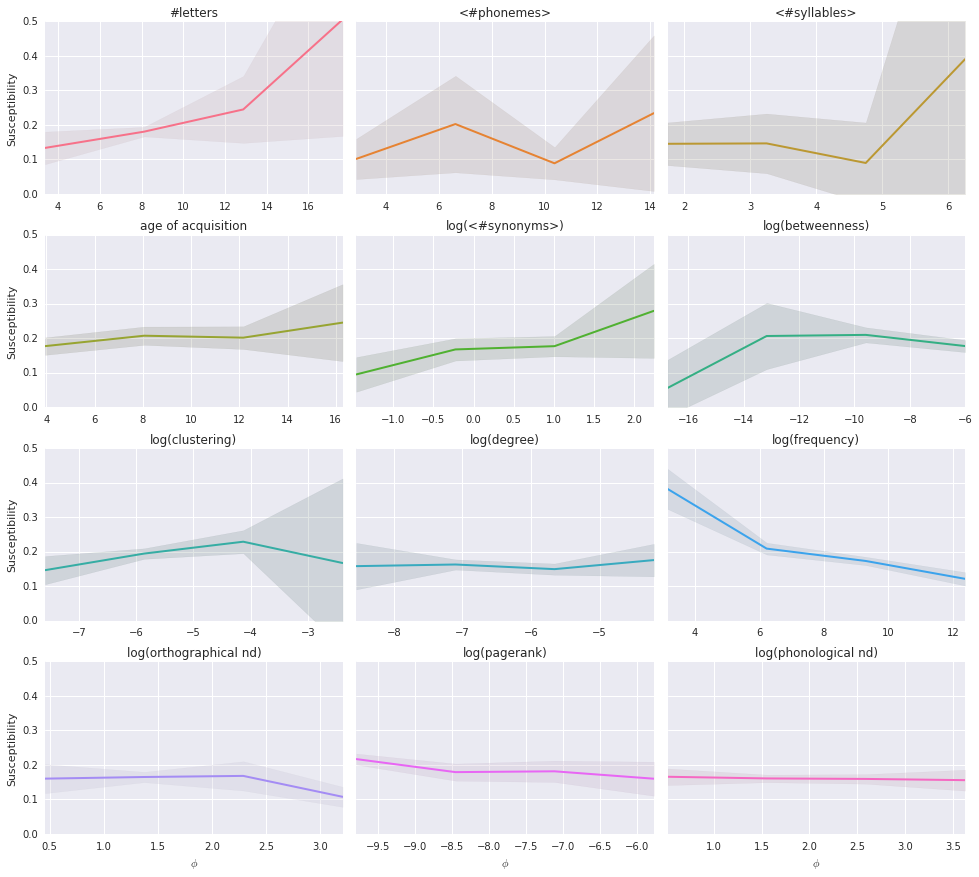

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

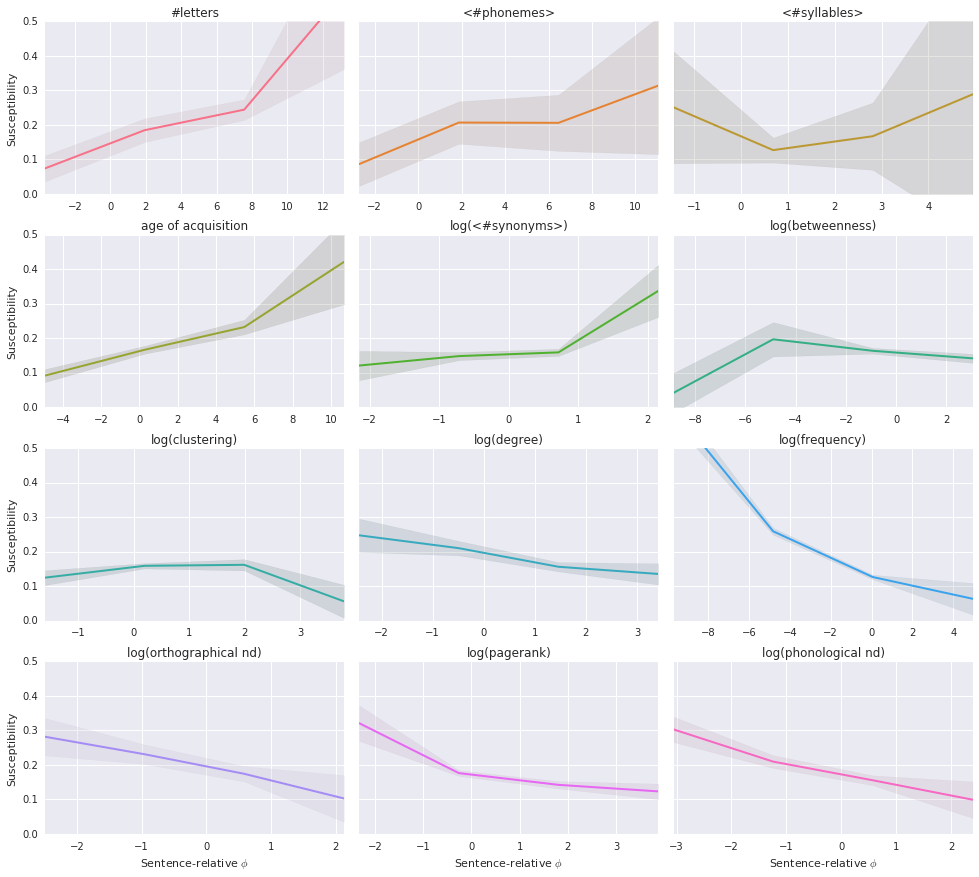

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

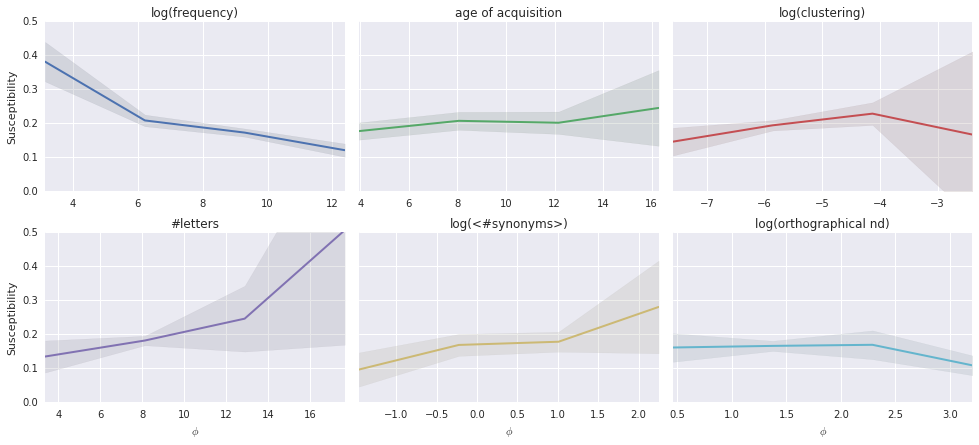

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

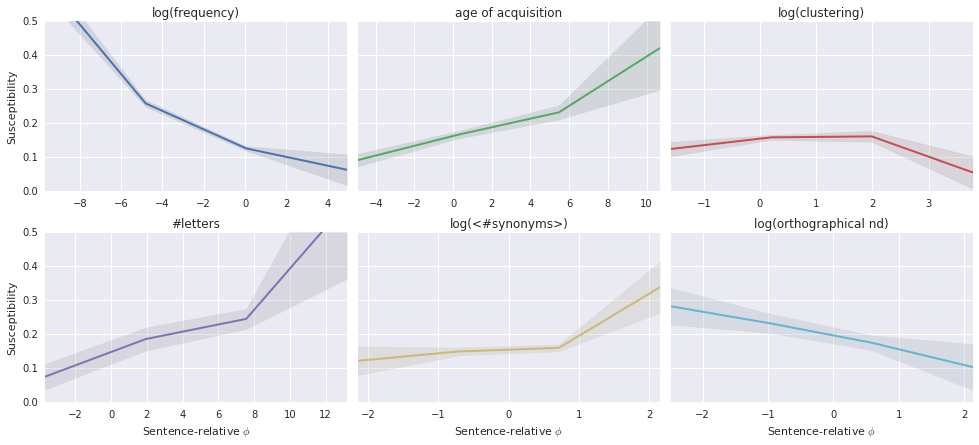

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'word']]
poses['rPOS'] = poses['POS'].apply(lambda x: x[0])

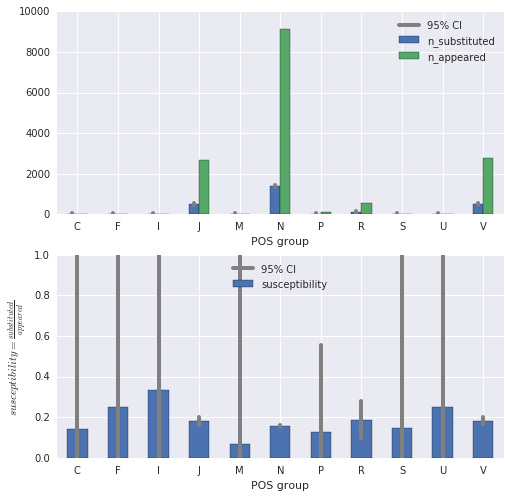

In [12]:
# Compute POS counts.
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='sison_glaz')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 1), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

## 4 Susceptibility in terms of absolute fractiles

In [13]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

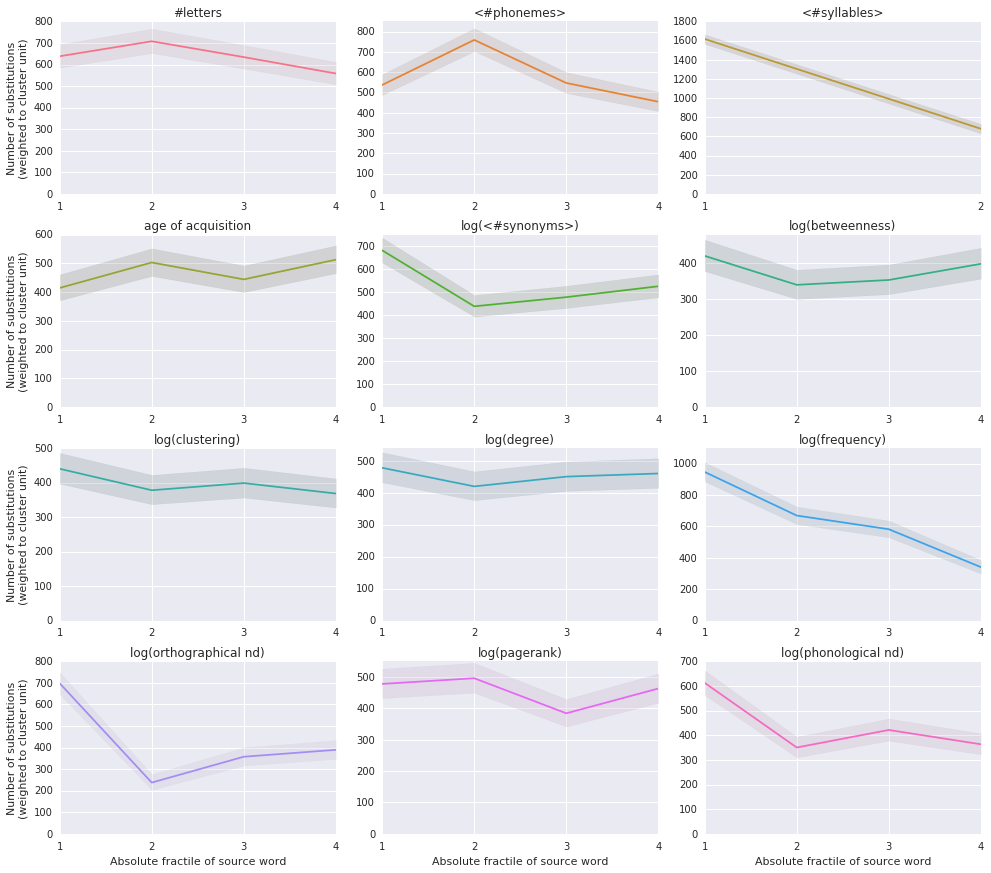

In [14]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

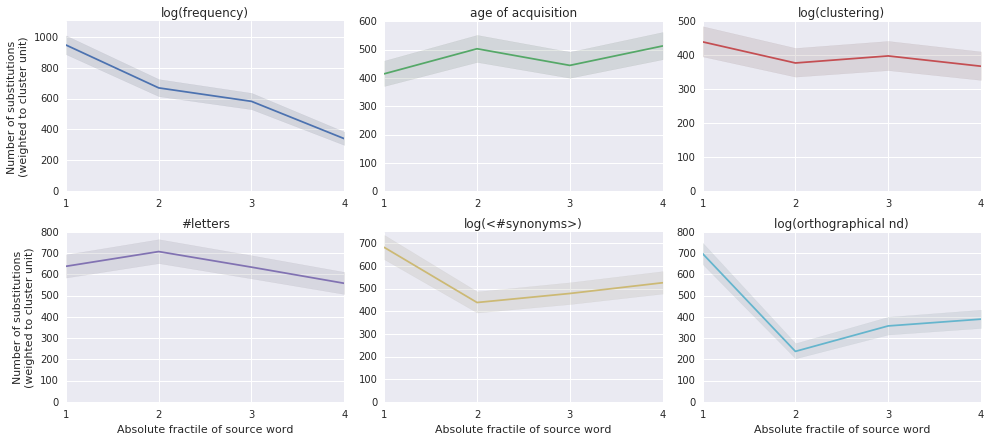

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [16]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   85 of 71288) |                    | Elapsed Time: 0:00:01 ETA:  0:14:01

  0% (  175 of 71288) |                    | Elapsed Time: 0:00:02 ETA:  0:13:17

  0% (  257 of 71288) |                    | Elapsed Time: 0:00:03 ETA:  0:13:51

  0% (  337 of 71288) |                    | Elapsed Time: 0:00:04 ETA:  0:14:11

  0% (  416 of 71288) |                    | Elapsed Time: 0:00:05 ETA:  0:14:24

  0% (  495 of 71288) |                    | Elapsed Time: 0:00:06 ETA:  0:14:30

  0% (  583 of 71288) |                    | Elapsed Time: 0:00:07 ETA:  0:14:18

  0% (  674 of 71288) |                    | Elapsed Time: 0:00:08 ETA:  0:14:05

  1% (  763 of 71288) |                    | Elapsed Time: 0:00:09 ETA:  0:13:58

  1% (  855 of 71288) |                    | Elapsed Time: 0:00:10 ETA:  0:13:50

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:10 ETA:  0:13:49

  1% (  984 of 71288) |                    | Elapsed Time: 0:00:11 ETA:  0:13:37

  1% ( 1075 of 71288) |                    | Elapsed Time: 0:00:12 ETA:  0:13:23

  1% ( 1165 of 71288) |                    | Elapsed Time: 0:00:13 ETA:  0:13:10

  1% ( 1257 of 71288) |                    | Elapsed Time: 0:00:14 ETA:  0:12:55

  1% ( 1361 of 71288) |                    | Elapsed Time: 0:00:15 ETA:  0:12:37

  2% ( 1462 of 71288) |                    | Elapsed Time: 0:00:16 ETA:  0:12:26

  2% ( 1564 of 71288) |                    | Elapsed Time: 0:00:17 ETA:  0:12:13

  2% ( 1671 of 71288) |                    | Elapsed Time: 0:00:18 ETA:  0:11:58

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:19 ETA:  0:11:48

  2% ( 1893 of 71288) |                    | Elapsed Time: 0:00:20 ETA:  0:11:30

  2% ( 1984 of 71288) |                    | Elapsed Time: 0:00:21 ETA:  0:11:27

  2% ( 2061 of 71288) |                    | Elapsed Time: 0:00:22 ETA:  0:11:40

  2% ( 2138 of 71288) |                    | Elapsed Time: 0:00:23 ETA:  0:12:04

  3% ( 2217 of 71288) |                    | Elapsed Time: 0:00:24 ETA:  0:12:25

  3% ( 2296 of 71288) |                    | Elapsed Time: 0:00:25 ETA:  0:12:48

  3% ( 2374 of 71288) |                    | Elapsed Time: 0:00:26 ETA:  0:13:19

  3% ( 2451 of 71288) |                    | Elapsed Time: 0:00:27 ETA:  0:13:48

  3% ( 2529 of 71288) |                    | Elapsed Time: 0:00:28 ETA:  0:13:55

  3% ( 2607 of 71288) |                    | Elapsed Time: 0:00:29 ETA:  0:14:32

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:00:30 ETA:  0:14:46

  3% ( 2763 of 71288) |                    | Elapsed Time: 0:00:31 ETA:  0:14:30

  3% ( 2851 of 71288) |                    | Elapsed Time: 0:00:32 ETA:  0:14:15

  4% ( 2938 of 71288) |                    | Elapsed Time: 0:00:33 ETA:  0:14:04

  4% ( 3026 of 71288) |                    | Elapsed Time: 0:00:34 ETA:  0:13:52

  4% ( 3113 of 71288) |                    | Elapsed Time: 0:00:35 ETA:  0:13:40

  4% ( 3188 of 71288) |                    | Elapsed Time: 0:00:36 ETA:  0:13:41

  4% ( 3263 of 71288) |                    | Elapsed Time: 0:00:37 ETA:  0:13:45

  4% ( 3337 of 71288) |                    | Elapsed Time: 0:00:38 ETA:  0:13:48

  4% ( 3409 of 71288) |                    | Elapsed Time: 0:00:39 ETA:  0:13:57

  4% ( 3501 of 71288) |                    | Elapsed Time: 0:00:40 ETA:  0:13:52

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:00:41 ETA:  0:13:29

  5% ( 3726 of 71288) |#                   | Elapsed Time: 0:00:42 ETA:  0:12:08

  5% ( 3886 of 71288) |#                   | Elapsed Time: 0:00:43 ETA:  0:11:02

  5% ( 4047 of 71288) |#                   | Elapsed Time: 0:00:44 ETA:  0:10:05

  5% ( 4201 of 71288) |#                   | Elapsed Time: 0:00:45 ETA:  0:09:14

  6% ( 4350 of 71288) |#                   | Elapsed Time: 0:00:46 ETA:  0:08:32

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:00:46 ETA:  0:07:57

  6% ( 4552 of 71288) |#                   | Elapsed Time: 0:00:47 ETA:  0:07:45

  6% ( 4635 of 71288) |#                   | Elapsed Time: 0:00:48 ETA:  0:07:48

  6% ( 4716 of 71288) |#                   | Elapsed Time: 0:00:49 ETA:  0:08:13

  6% ( 4804 of 71288) |#                   | Elapsed Time: 0:00:50 ETA:  0:08:49

  6% ( 4890 of 71288) |#                   | Elapsed Time: 0:00:51 ETA:  0:09:30

  6% ( 4976 of 71288) |#                   | Elapsed Time: 0:00:52 ETA:  0:10:20

  7% ( 5060 of 71288) |#                   | Elapsed Time: 0:00:53 ETA:  0:11:14

  7% ( 5146 of 71288) |#                   | Elapsed Time: 0:00:54 ETA:  0:12:11

  7% ( 5232 of 71288) |#                   | Elapsed Time: 0:00:55 ETA:  0:12:56

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:00:57 ETA:  0:12:45

  7% ( 5436 of 71288) |#                   | Elapsed Time: 0:00:58 ETA:  0:12:35

  7% ( 5532 of 71288) |#                   | Elapsed Time: 0:00:59 ETA:  0:12:25

  7% ( 5641 of 71288) |#                   | Elapsed Time: 0:01:00 ETA:  0:12:00

  8% ( 5727 of 71288) |#                   | Elapsed Time: 0:01:01 ETA:  0:11:59

  8% ( 5830 of 71288) |#                   | Elapsed Time: 0:01:02 ETA:  0:11:38

  8% ( 5943 of 71288) |#                   | Elapsed Time: 0:01:03 ETA:  0:11:10

  8% ( 6056 of 71288) |#                   | Elapsed Time: 0:01:04 ETA:  0:10:45

  8% ( 6157 of 71288) |#                   | Elapsed Time: 0:01:05 ETA:  0:10:40

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:06 ETA:  0:10:53

  8% ( 6321 of 71288) |#                   | Elapsed Time: 0:01:07 ETA:  0:10:57

  8% ( 6406 of 71288) |#                   | Elapsed Time: 0:01:08 ETA:  0:11:04

  9% ( 6493 of 71288) |#                   | Elapsed Time: 0:01:09 ETA:  0:11:22

  9% ( 6579 of 71288) |#                   | Elapsed Time: 0:01:10 ETA:  0:11:22

  9% ( 6711 of 71288) |#                   | Elapsed Time: 0:01:11 ETA:  0:10:56

  9% ( 6845 of 71288) |#                   | Elapsed Time: 0:01:12 ETA:  0:10:38

  9% ( 6973 of 71288) |#                   | Elapsed Time: 0:01:13 ETA:  0:10:26

  9% ( 7087 of 71288) |#                   | Elapsed Time: 0:01:14 ETA:  0:10:15

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:14 ETA:  0:10:06

 10% ( 7220 of 71288) |##                  | Elapsed Time: 0:01:15 ETA:  0:10:00

 10% ( 7312 of 71288) |##                  | Elapsed Time: 0:01:16 ETA:  0:09:54

 10% ( 7405 of 71288) |##                  | Elapsed Time: 0:01:17 ETA:  0:09:49

 10% ( 7496 of 71288) |##                  | Elapsed Time: 0:01:18 ETA:  0:09:43

 10% ( 7590 of 71288) |##                  | Elapsed Time: 0:01:19 ETA:  0:10:11

 10% ( 7684 of 71288) |##                  | Elapsed Time: 0:01:20 ETA:  0:10:43

 10% ( 7777 of 71288) |##                  | Elapsed Time: 0:01:21 ETA:  0:11:13

 11% ( 7871 of 71288) |##                  | Elapsed Time: 0:01:22 ETA:  0:11:31

 11% ( 7963 of 71288) |##                  | Elapsed Time: 0:01:23 ETA:  0:11:29

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:01:24 ETA:  0:11:27

 11% ( 8114 of 71288) |##                  | Elapsed Time: 0:01:25 ETA:  0:11:25

 11% ( 8206 of 71288) |##                  | Elapsed Time: 0:01:26 ETA:  0:11:24

 11% ( 8300 of 71288) |##                  | Elapsed Time: 0:01:27 ETA:  0:11:21

 11% ( 8391 of 71288) |##                  | Elapsed Time: 0:01:28 ETA:  0:11:23

 11% ( 8483 of 71288) |##                  | Elapsed Time: 0:01:29 ETA:  0:11:23

 12% ( 8573 of 71288) |##                  | Elapsed Time: 0:01:30 ETA:  0:11:25

 12% ( 8666 of 71288) |##                  | Elapsed Time: 0:01:31 ETA:  0:11:25

 12% ( 8757 of 71288) |##                  | Elapsed Time: 0:01:32 ETA:  0:11:25

 12% ( 8849 of 71288) |##                  | Elapsed Time: 0:01:33 ETA:  0:11:25

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:01:33 ETA:  0:11:26

 12% ( 9015 of 71288) |##                  | Elapsed Time: 0:01:34 ETA:  0:11:15

 12% ( 9120 of 71288) |##                  | Elapsed Time: 0:01:35 ETA:  0:11:03

 12% ( 9219 of 71288) |##                  | Elapsed Time: 0:01:36 ETA:  0:10:56

 13% ( 9321 of 71288) |##                  | Elapsed Time: 0:01:37 ETA:  0:10:46

 13% ( 9424 of 71288) |##                  | Elapsed Time: 0:01:38 ETA:  0:10:34

 13% ( 9532 of 71288) |##                  | Elapsed Time: 0:01:39 ETA:  0:10:19

 13% ( 9649 of 71288) |##                  | Elapsed Time: 0:01:40 ETA:  0:09:57

 13% ( 9757 of 71288) |##                  | Elapsed Time: 0:01:41 ETA:  0:09:44

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:01:42 ETA:  0:09:35

 13% ( 9908 of 71288) |##                  | Elapsed Time: 0:01:43 ETA:  0:09:33

 14% (10011 of 71288) |##                  | Elapsed Time: 0:01:44 ETA:  0:09:34

 14% (10107 of 71288) |##                  | Elapsed Time: 0:01:45 ETA:  0:09:35

 14% (10210 of 71288) |##                  | Elapsed Time: 0:01:46 ETA:  0:09:33

 14% (10293 of 71288) |##                  | Elapsed Time: 0:01:47 ETA:  0:09:48

 14% (10378 of 71288) |##                  | Elapsed Time: 0:01:48 ETA:  0:10:07

 14% (10462 of 71288) |##                  | Elapsed Time: 0:01:49 ETA:  0:10:35

 14% (10545 of 71288) |##                  | Elapsed Time: 0:01:50 ETA:  0:10:57

 14% (10630 of 71288) |##                  | Elapsed Time: 0:01:51 ETA:  0:11:09

 15% (10694 of 71288) |###                 | Elapsed Time: 0:01:52 ETA:  0:11:22

 15% (10789 of 71288) |###                 | Elapsed Time: 0:01:53 ETA:  0:11:29

 15% (10884 of 71288) |###                 | Elapsed Time: 0:01:54 ETA:  0:11:28

 15% (10978 of 71288) |###                 | Elapsed Time: 0:01:55 ETA:  0:11:36

 15% (11072 of 71288) |###                 | Elapsed Time: 0:01:56 ETA:  0:11:23

 15% (11167 of 71288) |###                 | Elapsed Time: 0:01:57 ETA:  0:11:11

 15% (11262 of 71288) |###                 | Elapsed Time: 0:01:58 ETA:  0:11:00

 15% (11357 of 71288) |###                 | Elapsed Time: 0:01:59 ETA:  0:10:48

 16% (11457 of 71288) |###                 | Elapsed Time: 0:02:00 ETA:  0:10:33

 16% (11553 of 71288) |###                 | Elapsed Time: 0:02:01 ETA:  0:10:28

 16% (11585 of 71288) |###                 | Elapsed Time: 0:02:01 ETA:  0:10:26

 16% (11684 of 71288) |###                 | Elapsed Time: 0:02:02 ETA:  0:10:22

 16% (11780 of 71288) |###                 | Elapsed Time: 0:02:03 ETA:  0:10:19

 16% (11875 of 71288) |###                 | Elapsed Time: 0:02:04 ETA:  0:10:17

 16% (11973 of 71288) |###                 | Elapsed Time: 0:02:05 ETA:  0:10:13

 16% (12071 of 71288) |###                 | Elapsed Time: 0:02:06 ETA:  0:10:09

 17% (12169 of 71288) |###                 | Elapsed Time: 0:02:07 ETA:  0:10:05

 17% (12265 of 71288) |###                 | Elapsed Time: 0:02:08 ETA:  0:10:08

 17% (12363 of 71288) |###                 | Elapsed Time: 0:02:09 ETA:  0:10:05

 17% (12476 of 71288) |###                 | Elapsed Time: 0:02:10 ETA:  0:10:06

 17% (12576 of 71288) |###                 | Elapsed Time: 0:02:11 ETA:  0:10:01

 17% (12675 of 71288) |###                 | Elapsed Time: 0:02:12 ETA:  0:09:57

 17% (12773 of 71288) |###                 | Elapsed Time: 0:02:13 ETA:  0:09:56

 18% (12873 of 71288) |###                 | Elapsed Time: 0:02:14 ETA:  0:09:53

 18% (12971 of 71288) |###                 | Elapsed Time: 0:02:15 ETA:  0:09:52

 18% (13069 of 71288) |###                 | Elapsed Time: 0:02:16 ETA:  0:09:49

 18% (13169 of 71288) |###                 | Elapsed Time: 0:02:17 ETA:  0:09:46

 18% (13270 of 71288) |###                 | Elapsed Time: 0:02:18 ETA:  0:09:43

 18% (13367 of 71288) |###                 | Elapsed Time: 0:02:19 ETA:  0:09:42

 18% (13466 of 71288) |###                 | Elapsed Time: 0:02:20 ETA:  0:09:42

 19% (13567 of 71288) |###                 | Elapsed Time: 0:02:21 ETA:  0:09:40

 19% (13663 of 71288) |###                 | Elapsed Time: 0:02:22 ETA:  0:09:41

 19% (13758 of 71288) |###                 | Elapsed Time: 0:02:23 ETA:  0:09:44

 19% (13854 of 71288) |###                 | Elapsed Time: 0:02:24 ETA:  0:09:45

 19% (13952 of 71288) |###                 | Elapsed Time: 0:02:25 ETA:  0:09:44

 19% (14053 of 71288) |###                 | Elapsed Time: 0:02:26 ETA:  0:09:42

 19% (14153 of 71288) |###                 | Elapsed Time: 0:02:27 ETA:  0:09:42

 20% (14258 of 71288) |####                | Elapsed Time: 0:02:28 ETA:  0:09:40

 20% (14358 of 71288) |####                | Elapsed Time: 0:02:29 ETA:  0:09:40

 20% (14457 of 71288) |####                | Elapsed Time: 0:02:30 ETA:  0:09:36

 20% (14557 of 71288) |####                | Elapsed Time: 0:02:31 ETA:  0:09:30

 20% (14655 of 71288) |####                | Elapsed Time: 0:02:32 ETA:  0:09:27

 20% (14754 of 71288) |####                | Elapsed Time: 0:02:33 ETA:  0:09:25

 20% (14864 of 71288) |####                | Elapsed Time: 0:02:34 ETA:  0:09:16

 20% (14949 of 71288) |####                | Elapsed Time: 0:02:35 ETA:  0:09:28

 21% (15031 of 71288) |####                | Elapsed Time: 0:02:36 ETA:  0:09:44

 21% (15113 of 71288) |####                | Elapsed Time: 0:02:37 ETA:  0:09:56

 21% (15149 of 71288) |####                | Elapsed Time: 0:02:38 ETA:  0:10:07

 21% (15229 of 71288) |####                | Elapsed Time: 0:02:39 ETA:  0:10:25

 21% (15313 of 71288) |####                | Elapsed Time: 0:02:40 ETA:  0:10:41

 21% (15410 of 71288) |####                | Elapsed Time: 0:02:41 ETA:  0:10:40

 21% (15501 of 71288) |####                | Elapsed Time: 0:02:42 ETA:  0:10:48

 21% (15600 of 71288) |####                | Elapsed Time: 0:02:43 ETA:  0:10:59

 22% (15692 of 71288) |####                | Elapsed Time: 0:02:44 ETA:  0:10:51

 22% (15770 of 71288) |####                | Elapsed Time: 0:02:45 ETA:  0:10:54

 22% (15846 of 71288) |####                | Elapsed Time: 0:02:46 ETA:  0:11:00

 22% (15925 of 71288) |####                | Elapsed Time: 0:02:47 ETA:  0:11:05

 22% (16004 of 71288) |####                | Elapsed Time: 0:02:48 ETA:  0:11:05

 22% (16040 of 71288) |####                | Elapsed Time: 0:02:48 ETA:  0:10:54

 22% (16145 of 71288) |####                | Elapsed Time: 0:02:49 ETA:  0:10:44

 22% (16250 of 71288) |####                | Elapsed Time: 0:02:50 ETA:  0:10:28

 22% (16354 of 71288) |####                | Elapsed Time: 0:02:51 ETA:  0:10:22

 23% (16460 of 71288) |####                | Elapsed Time: 0:02:52 ETA:  0:10:07

 23% (16567 of 71288) |####                | Elapsed Time: 0:02:53 ETA:  0:09:38

 23% (16674 of 71288) |####                | Elapsed Time: 0:02:54 ETA:  0:09:08

 23% (16714 of 71288) |####                | Elapsed Time: 0:02:58 ETA:  0:12:55

 23% (16802 of 71288) |####                | Elapsed Time: 0:02:59 ETA:  0:12:44

 23% (16866 of 71288) |####                | Elapsed Time: 0:03:00 ETA:  0:13:07

 23% (16931 of 71288) |####                | Elapsed Time: 0:03:00 ETA:  0:13:24

 23% (17015 of 71288) |####                | Elapsed Time: 0:03:01 ETA:  0:13:50

 23% (17090 of 71288) |####                | Elapsed Time: 0:03:02 ETA:  0:14:29

 24% (17184 of 71288) |####                | Elapsed Time: 0:03:03 ETA:  0:14:46

 24% (17329 of 71288) |####                | Elapsed Time: 0:03:04 ETA:  0:13:51

 24% (17456 of 71288) |####                | Elapsed Time: 0:03:05 ETA:  0:13:24

 24% (17567 of 71288) |####                | Elapsed Time: 0:03:06 ETA:  0:08:59

 24% (17698 of 71288) |####                | Elapsed Time: 0:03:07 ETA:  0:08:23

 24% (17794 of 71288) |####                | Elapsed Time: 0:03:08 ETA:  0:07:59

 25% (17823 of 71288) |#####               | Elapsed Time: 0:03:08 ETA:  0:07:54

 25% (17925 of 71288) |#####               | Elapsed Time: 0:03:09 ETA:  0:07:40

 25% (18016 of 71288) |#####               | Elapsed Time: 0:03:10 ETA:  0:07:27

 25% (18101 of 71288) |#####               | Elapsed Time: 0:03:11 ETA:  0:07:32

 25% (18188 of 71288) |#####               | Elapsed Time: 0:03:12 ETA:  0:08:15

 25% (18277 of 71288) |#####               | Elapsed Time: 0:03:13 ETA:  0:08:45

 25% (18360 of 71288) |#####               | Elapsed Time: 0:03:14 ETA:  0:09:10

 25% (18458 of 71288) |#####               | Elapsed Time: 0:03:16 ETA:  0:09:42

 26% (18569 of 71288) |#####               | Elapsed Time: 0:03:17 ETA:  0:09:25

 26% (18686 of 71288) |#####               | Elapsed Time: 0:03:18 ETA:  0:09:08

 26% (18714 of 71288) |#####               | Elapsed Time: 0:03:18 ETA:  0:09:10

 26% (18825 of 71288) |#####               | Elapsed Time: 0:03:19 ETA:  0:08:50

 26% (18914 of 71288) |#####               | Elapsed Time: 0:03:20 ETA:  0:08:46

 26% (18990 of 71288) |#####               | Elapsed Time: 0:03:21 ETA:  0:08:55

 26% (19066 of 71288) |#####               | Elapsed Time: 0:03:22 ETA:  0:09:06

 26% (19142 of 71288) |#####               | Elapsed Time: 0:03:23 ETA:  0:09:12

 26% (19226 of 71288) |#####               | Elapsed Time: 0:03:24 ETA:  0:09:25

 27% (19302 of 71288) |#####               | Elapsed Time: 0:03:25 ETA:  0:10:02

 27% (19427 of 71288) |#####               | Elapsed Time: 0:03:26 ETA:  0:09:52

 27% (19557 of 71288) |#####               | Elapsed Time: 0:03:27 ETA:  0:09:18

 27% (19605 of 71288) |#####               | Elapsed Time: 0:03:27 ETA:  0:09:21

 27% (19734 of 71288) |#####               | Elapsed Time: 0:03:28 ETA:  0:08:43

 27% (19864 of 71288) |#####               | Elapsed Time: 0:03:29 ETA:  0:07:56

 28% (19983 of 71288) |#####               | Elapsed Time: 0:03:30 ETA:  0:07:23

 28% (20076 of 71288) |#####               | Elapsed Time: 0:03:31 ETA:  0:07:10

 28% (20169 of 71288) |#####               | Elapsed Time: 0:03:32 ETA:  0:07:03

 28% (20262 of 71288) |#####               | Elapsed Time: 0:03:33 ETA:  0:06:50

 28% (20354 of 71288) |#####               | Elapsed Time: 0:03:34 ETA:  0:07:11

 28% (20446 of 71288) |#####               | Elapsed Time: 0:03:35 ETA:  0:07:38

 28% (20496 of 71288) |#####               | Elapsed Time: 0:03:36 ETA:  0:07:50

 28% (20588 of 71288) |#####               | Elapsed Time: 0:03:37 ETA:  0:08:18

 29% (20680 of 71288) |#####               | Elapsed Time: 0:03:38 ETA:  0:08:51

 29% (20773 of 71288) |#####               | Elapsed Time: 0:03:39 ETA:  0:09:15

 29% (20866 of 71288) |#####               | Elapsed Time: 0:03:40 ETA:  0:09:14

 29% (20960 of 71288) |#####               | Elapsed Time: 0:03:41 ETA:  0:09:11

 29% (21081 of 71288) |#####               | Elapsed Time: 0:03:42 ETA:  0:08:44

 29% (21151 of 71288) |#####               | Elapsed Time: 0:03:43 ETA:  0:09:04

 29% (21233 of 71288) |#####               | Elapsed Time: 0:03:44 ETA:  0:09:14

 29% (21316 of 71288) |#####               | Elapsed Time: 0:03:45 ETA:  0:09:22

 30% (21387 of 71288) |######              | Elapsed Time: 0:03:46 ETA:  0:09:30

 30% (21480 of 71288) |######              | Elapsed Time: 0:03:47 ETA:  0:09:27

 30% (21592 of 71288) |######              | Elapsed Time: 0:03:48 ETA:  0:09:07

 30% (21691 of 71288) |######              | Elapsed Time: 0:03:49 ETA:  0:09:01

 30% (21790 of 71288) |######              | Elapsed Time: 0:03:50 ETA:  0:08:56

 30% (21894 of 71288) |######              | Elapsed Time: 0:03:51 ETA:  0:09:10

 30% (21985 of 71288) |######              | Elapsed Time: 0:03:52 ETA:  0:08:49

 31% (22123 of 71288) |######              | Elapsed Time: 0:03:53 ETA:  0:08:00

 31% (22213 of 71288) |######              | Elapsed Time: 0:03:54 ETA:  0:07:53

 31% (22278 of 71288) |######              | Elapsed Time: 0:03:54 ETA:  0:07:35

 31% (22392 of 71288) |######              | Elapsed Time: 0:03:55 ETA:  0:07:18

 31% (22501 of 71288) |######              | Elapsed Time: 0:03:56 ETA:  0:07:20

 31% (22609 of 71288) |######              | Elapsed Time: 0:03:57 ETA:  0:07:11

 31% (22725 of 71288) |######              | Elapsed Time: 0:03:58 ETA:  0:06:58

 32% (22830 of 71288) |######              | Elapsed Time: 0:03:59 ETA:  0:06:56

 32% (22925 of 71288) |######              | Elapsed Time: 0:04:00 ETA:  0:06:53

 32% (23010 of 71288) |######              | Elapsed Time: 0:04:01 ETA:  0:07:31

 32% (23101 of 71288) |######              | Elapsed Time: 0:04:02 ETA:  0:07:30

 32% (23169 of 71288) |######              | Elapsed Time: 0:04:03 ETA:  0:07:33

 32% (23266 of 71288) |######              | Elapsed Time: 0:04:04 ETA:  0:07:46

 32% (23388 of 71288) |######              | Elapsed Time: 0:04:05 ETA:  0:07:35

 32% (23466 of 71288) |######              | Elapsed Time: 0:04:06 ETA:  0:07:58

 33% (23564 of 71288) |######              | Elapsed Time: 0:04:07 ETA:  0:08:13

 33% (23704 of 71288) |######              | Elapsed Time: 0:04:08 ETA:  0:07:42

 33% (23806 of 71288) |######              | Elapsed Time: 0:04:09 ETA:  0:07:35

 33% (23939 of 71288) |######              | Elapsed Time: 0:04:10 ETA:  0:06:57

 33% (24060 of 71288) |######              | Elapsed Time: 0:04:11 ETA:  0:06:25

 33% (24156 of 71288) |######              | Elapsed Time: 0:04:12 ETA:  0:06:30

 34% (24247 of 71288) |######              | Elapsed Time: 0:04:13 ETA:  0:06:32

 34% (24332 of 71288) |######              | Elapsed Time: 0:04:14 ETA:  0:06:56

 34% (24422 of 71288) |######              | Elapsed Time: 0:04:15 ETA:  0:06:47

 34% (24535 of 71288) |######              | Elapsed Time: 0:04:16 ETA:  0:06:36

 34% (24645 of 71288) |######              | Elapsed Time: 0:04:17 ETA:  0:06:56

 34% (24756 of 71288) |######              | Elapsed Time: 0:04:18 ETA:  0:06:49

 34% (24862 of 71288) |######              | Elapsed Time: 0:04:19 ETA:  0:07:07

 35% (24951 of 71288) |#######             | Elapsed Time: 0:04:20 ETA:  0:07:46

 35% (25025 of 71288) |#######             | Elapsed Time: 0:04:21 ETA:  0:08:01

 35% (25110 of 71288) |#######             | Elapsed Time: 0:04:22 ETA:  0:08:00

 35% (25187 of 71288) |#######             | Elapsed Time: 0:04:23 ETA:  0:08:11

 35% (25260 of 71288) |#######             | Elapsed Time: 0:04:24 ETA:  0:08:52

 35% (25364 of 71288) |#######             | Elapsed Time: 0:04:25 ETA:  0:08:57

 35% (25456 of 71288) |#######             | Elapsed Time: 0:04:26 ETA:  0:09:18

 35% (25558 of 71288) |#######             | Elapsed Time: 0:04:27 ETA:  0:09:22

 35% (25662 of 71288) |#######             | Elapsed Time: 0:04:28 ETA:  0:08:54

 36% (25754 of 71288) |#######             | Elapsed Time: 0:04:29 ETA:  0:08:52

 36% (25842 of 71288) |#######             | Elapsed Time: 0:04:30 ETA:  0:08:31

 36% (25927 of 71288) |#######             | Elapsed Time: 0:04:31 ETA:  0:08:30

 36% (26015 of 71288) |#######             | Elapsed Time: 0:04:32 ETA:  0:08:19

 36% (26121 of 71288) |#######             | Elapsed Time: 0:04:33 ETA:  0:07:49

 36% (26221 of 71288) |#######             | Elapsed Time: 0:04:34 ETA:  0:07:52

 36% (26307 of 71288) |#######             | Elapsed Time: 0:04:35 ETA:  0:07:56

 37% (26398 of 71288) |#######             | Elapsed Time: 0:04:36 ETA:  0:08:05

 37% (26493 of 71288) |#######             | Elapsed Time: 0:04:37 ETA:  0:08:13

 37% (26588 of 71288) |#######             | Elapsed Time: 0:04:38 ETA:  0:08:09

 37% (26683 of 71288) |#######             | Elapsed Time: 0:04:39 ETA:  0:08:09

 37% (26734 of 71288) |#######             | Elapsed Time: 0:04:40 ETA:  0:07:59

 37% (26828 of 71288) |#######             | Elapsed Time: 0:04:41 ETA:  0:07:51

 37% (26917 of 71288) |#######             | Elapsed Time: 0:04:42 ETA:  0:08:06

 37% (27002 of 71288) |#######             | Elapsed Time: 0:04:43 ETA:  0:08:20

 38% (27111 of 71288) |#######             | Elapsed Time: 0:04:44 ETA:  0:07:56

 38% (27187 of 71288) |#######             | Elapsed Time: 0:04:45 ETA:  0:08:10

 38% (27274 of 71288) |#######             | Elapsed Time: 0:04:46 ETA:  0:08:17

 38% (27386 of 71288) |#######             | Elapsed Time: 0:04:47 ETA:  0:07:59

 38% (27490 of 71288) |#######             | Elapsed Time: 0:04:48 ETA:  0:07:49

 38% (27587 of 71288) |#######             | Elapsed Time: 0:04:49 ETA:  0:07:47

 38% (27625 of 71288) |#######             | Elapsed Time: 0:04:49 ETA:  0:07:48

 38% (27729 of 71288) |#######             | Elapsed Time: 0:04:50 ETA:  0:07:33

 39% (27809 of 71288) |#######             | Elapsed Time: 0:04:51 ETA:  0:07:37

 39% (27891 of 71288) |#######             | Elapsed Time: 0:04:52 ETA:  0:08:01

 39% (27980 of 71288) |#######             | Elapsed Time: 0:04:53 ETA:  0:07:48

 39% (28073 of 71288) |#######             | Elapsed Time: 0:04:54 ETA:  0:07:41

 39% (28152 of 71288) |#######             | Elapsed Time: 0:04:55 ETA:  0:08:12

 39% (28232 of 71288) |#######             | Elapsed Time: 0:04:56 ETA:  0:08:36

 39% (28311 of 71288) |#######             | Elapsed Time: 0:04:57 ETA:  0:08:54

 39% (28400 of 71288) |#######             | Elapsed Time: 0:04:58 ETA:  0:08:53

 39% (28492 of 71288) |#######             | Elapsed Time: 0:04:59 ETA:  0:09:05

 40% (28516 of 71288) |########            | Elapsed Time: 0:04:59 ETA:  0:08:54

 40% (28636 of 71288) |########            | Elapsed Time: 0:05:00 ETA:  0:08:10

 40% (28745 of 71288) |########            | Elapsed Time: 0:05:01 ETA:  0:07:48

 40% (28861 of 71288) |########            | Elapsed Time: 0:05:02 ETA:  0:07:25

 40% (28950 of 71288) |########            | Elapsed Time: 0:05:03 ETA:  0:07:15

 40% (29049 of 71288) |########            | Elapsed Time: 0:05:04 ETA:  0:06:58

 40% (29143 of 71288) |########            | Elapsed Time: 0:05:05 ETA:  0:06:44

 41% (29245 of 71288) |########            | Elapsed Time: 0:05:06 ETA:  0:06:32

 41% (29340 of 71288) |########            | Elapsed Time: 0:05:07 ETA:  0:06:29

 41% (29407 of 71288) |########            | Elapsed Time: 0:05:08 ETA:  0:06:37

 41% (29495 of 71288) |########            | Elapsed Time: 0:05:09 ETA:  0:07:03

 41% (29581 of 71288) |########            | Elapsed Time: 0:05:10 ETA:  0:07:22

 41% (29741 of 71288) |########            | Elapsed Time: 0:05:11 ETA:  0:06:43

 41% (29906 of 71288) |########            | Elapsed Time: 0:05:12 ETA:  0:05:45

 42% (30000 of 71288) |########            | Elapsed Time: 0:05:13 ETA:  0:05:47

 42% (30084 of 71288) |########            | Elapsed Time: 0:05:14 ETA:  0:05:53

 42% (30166 of 71288) |########            | Elapsed Time: 0:05:15 ETA:  0:06:07

 42% (30255 of 71288) |########            | Elapsed Time: 0:05:16 ETA:  0:06:09

 42% (30298 of 71288) |########            | Elapsed Time: 0:05:17 ETA:  0:06:05

 42% (30383 of 71288) |########            | Elapsed Time: 0:05:18 ETA:  0:06:06

 42% (30462 of 71288) |########            | Elapsed Time: 0:05:19 ETA:  0:06:11

 42% (30546 of 71288) |########            | Elapsed Time: 0:05:20 ETA:  0:07:15

 43% (30655 of 71288) |########            | Elapsed Time: 0:05:21 ETA:  0:08:10

 43% (30750 of 71288) |########            | Elapsed Time: 0:05:22 ETA:  0:08:08

 43% (30841 of 71288) |########            | Elapsed Time: 0:05:23 ETA:  0:07:59

 43% (30953 of 71288) |########            | Elapsed Time: 0:05:24 ETA:  0:07:28

 43% (31079 of 71288) |########            | Elapsed Time: 0:05:25 ETA:  0:06:52

 43% (31189 of 71288) |########            | Elapsed Time: 0:05:26 ETA:  0:06:23

 43% (31303 of 71288) |########            | Elapsed Time: 0:05:27 ETA:  0:06:00

 44% (31389 of 71288) |########            | Elapsed Time: 0:05:28 ETA:  0:05:53

 44% (31489 of 71288) |########            | Elapsed Time: 0:05:29 ETA:  0:05:40

 44% (31607 of 71288) |########            | Elapsed Time: 0:05:30 ETA:  0:05:33

 44% (31707 of 71288) |########            | Elapsed Time: 0:05:31 ETA:  0:05:28

 44% (31799 of 71288) |########            | Elapsed Time: 0:05:32 ETA:  0:05:27

 44% (31884 of 71288) |########            | Elapsed Time: 0:05:33 ETA:  0:05:45

 44% (31967 of 71288) |########            | Elapsed Time: 0:05:34 ETA:  0:06:18

 44% (32050 of 71288) |########            | Elapsed Time: 0:05:35 ETA:  0:06:54

 45% (32080 of 71288) |#########           | Elapsed Time: 0:05:35 ETA:  0:07:12

 45% (32180 of 71288) |#########           | Elapsed Time: 0:05:36 ETA:  0:06:57

 45% (32289 of 71288) |#########           | Elapsed Time: 0:05:37 ETA:  0:06:48

 45% (32382 of 71288) |#########           | Elapsed Time: 0:05:38 ETA:  0:07:11

 45% (32483 of 71288) |#########           | Elapsed Time: 0:05:39 ETA:  0:07:09

 45% (32566 of 71288) |#########           | Elapsed Time: 0:05:40 ETA:  0:07:17

 45% (32662 of 71288) |#########           | Elapsed Time: 0:05:41 ETA:  0:07:05

 45% (32742 of 71288) |#########           | Elapsed Time: 0:05:42 ETA:  0:07:08

 46% (32812 of 71288) |#########           | Elapsed Time: 0:05:43 ETA:  0:07:20

 46% (32897 of 71288) |#########           | Elapsed Time: 0:05:44 ETA:  0:07:25

 46% (32971 of 71288) |#########           | Elapsed Time: 0:05:45 ETA:  0:07:26

 46% (33055 of 71288) |#########           | Elapsed Time: 0:05:46 ETA:  0:07:52

 46% (33147 of 71288) |#########           | Elapsed Time: 0:05:47 ETA:  0:07:52

 46% (33231 of 71288) |#########           | Elapsed Time: 0:05:48 ETA:  0:08:10

 46% (33332 of 71288) |#########           | Elapsed Time: 0:05:49 ETA:  0:07:49

 46% (33420 of 71288) |#########           | Elapsed Time: 0:05:50 ETA:  0:07:57

 47% (33507 of 71288) |#########           | Elapsed Time: 0:05:51 ETA:  0:07:47

 47% (33598 of 71288) |#########           | Elapsed Time: 0:05:52 ETA:  0:07:24

 47% (33690 of 71288) |#########           | Elapsed Time: 0:05:53 ETA:  0:07:16

 47% (33782 of 71288) |#########           | Elapsed Time: 0:05:54 ETA:  0:07:20

 47% (33862 of 71288) |#########           | Elapsed Time: 0:05:55 ETA:  0:07:11

 47% (33948 of 71288) |#########           | Elapsed Time: 0:05:56 ETA:  0:07:15

 47% (34068 of 71288) |#########           | Elapsed Time: 0:05:57 ETA:  0:06:39

 47% (34156 of 71288) |#########           | Elapsed Time: 0:05:58 ETA:  0:06:51

 48% (34233 of 71288) |#########           | Elapsed Time: 0:05:59 ETA:  0:07:00

 48% (34327 of 71288) |#########           | Elapsed Time: 0:06:00 ETA:  0:06:52

 48% (34427 of 71288) |#########           | Elapsed Time: 0:06:01 ETA:  0:06:43

 48% (34547 of 71288) |#########           | Elapsed Time: 0:06:02 ETA:  0:06:17

 48% (34639 of 71288) |#########           | Elapsed Time: 0:06:03 ETA:  0:06:17

 48% (34719 of 71288) |#########           | Elapsed Time: 0:06:04 ETA:  0:06:28

 48% (34753 of 71288) |#########           | Elapsed Time: 0:06:04 ETA:  0:06:31

 48% (34825 of 71288) |#########           | Elapsed Time: 0:06:05 ETA:  0:07:18

 48% (34926 of 71288) |#########           | Elapsed Time: 0:06:06 ETA:  0:07:03

 49% (35022 of 71288) |#########           | Elapsed Time: 0:06:07 ETA:  0:06:43

 49% (35108 of 71288) |#########           | Elapsed Time: 0:06:08 ETA:  0:06:50

 49% (35191 of 71288) |#########           | Elapsed Time: 0:06:09 ETA:  0:07:06

 49% (35273 of 71288) |#########           | Elapsed Time: 0:06:10 ETA:  0:07:47

 49% (35356 of 71288) |#########           | Elapsed Time: 0:06:11 ETA:  0:07:56

 49% (35439 of 71288) |#########           | Elapsed Time: 0:06:12 ETA:  0:07:51

 49% (35522 of 71288) |#########           | Elapsed Time: 0:06:13 ETA:  0:07:43

 49% (35609 of 71288) |#########           | Elapsed Time: 0:06:14 ETA:  0:07:27

 50% (35645 of 71288) |##########          | Elapsed Time: 0:06:15 ETA:  0:07:45

 50% (35729 of 71288) |##########          | Elapsed Time: 0:06:16 ETA:  0:07:59

 50% (35825 of 71288) |##########          | Elapsed Time: 0:06:17 ETA:  0:07:46

 50% (35911 of 71288) |##########          | Elapsed Time: 0:06:18 ETA:  0:07:42

 50% (36005 of 71288) |##########          | Elapsed Time: 0:06:19 ETA:  0:07:27

 50% (36108 of 71288) |##########          | Elapsed Time: 0:06:20 ETA:  0:07:04

 50% (36205 of 71288) |##########          | Elapsed Time: 0:06:21 ETA:  0:06:48

 50% (36288 of 71288) |##########          | Elapsed Time: 0:06:22 ETA:  0:06:48

 51% (36369 of 71288) |##########          | Elapsed Time: 0:06:23 ETA:  0:06:53

 51% (36450 of 71288) |##########          | Elapsed Time: 0:06:24 ETA:  0:06:57

 51% (36536 of 71288) |##########          | Elapsed Time: 0:06:25 ETA:  0:07:08

 51% (36644 of 71288) |##########          | Elapsed Time: 0:06:26 ETA:  0:06:42

 51% (36776 of 71288) |##########          | Elapsed Time: 0:06:27 ETA:  0:06:02

 51% (36894 of 71288) |##########          | Elapsed Time: 0:06:28 ETA:  0:05:47

 51% (37008 of 71288) |##########          | Elapsed Time: 0:06:29 ETA:  0:05:31

 52% (37119 of 71288) |##########          | Elapsed Time: 0:06:30 ETA:  0:05:05

 52% (37225 of 71288) |##########          | Elapsed Time: 0:06:31 ETA:  0:04:43

 52% (37340 of 71288) |##########          | Elapsed Time: 0:06:32 ETA:  0:04:16

 52% (37427 of 71288) |##########          | Elapsed Time: 0:06:33 ETA:  0:03:51

 52% (37533 of 71288) |##########          | Elapsed Time: 0:06:34 ETA:  0:03:55

 52% (37639 of 71288) |##########          | Elapsed Time: 0:06:35 ETA:  0:03:55

 52% (37739 of 71288) |##########          | Elapsed Time: 0:06:36 ETA:  0:04:15

 53% (37847 of 71288) |##########          | Elapsed Time: 0:06:37 ETA:  0:04:21

 53% (37943 of 71288) |##########          | Elapsed Time: 0:06:38 ETA:  0:04:33

 53% (38025 of 71288) |##########          | Elapsed Time: 0:06:39 ETA:  0:04:53

 53% (38163 of 71288) |##########          | Elapsed Time: 0:06:40 ETA:  0:04:29

 53% (38271 of 71288) |##########          | Elapsed Time: 0:06:41 ETA:  0:04:33

 53% (38318 of 71288) |##########          | Elapsed Time: 0:06:41 ETA:  0:04:49

 53% (38437 of 71288) |##########          | Elapsed Time: 0:06:42 ETA:  0:04:37

 54% (38539 of 71288) |##########          | Elapsed Time: 0:06:43 ETA:  0:04:39

 54% (38546 of 71288) |##########          | Elapsed Time: 0:06:47 ETA:  0:09:31

 54% (38642 of 71288) |##########          | Elapsed Time: 0:06:48 ETA:  0:09:44

 54% (38748 of 71288) |##########          | Elapsed Time: 0:06:49 ETA:  0:09:31

 54% (38844 of 71288) |##########          | Elapsed Time: 0:06:50 ETA:  0:09:13

 54% (38962 of 71288) |##########          | Elapsed Time: 0:06:51 ETA:  0:09:36

 54% (39060 of 71288) |##########          | Elapsed Time: 0:06:52 ETA:  0:09:48

 54% (39154 of 71288) |##########          | Elapsed Time: 0:06:53 ETA:  0:09:26

 55% (39209 of 71288) |###########         | Elapsed Time: 0:06:53 ETA:  0:10:07

 55% (39306 of 71288) |###########         | Elapsed Time: 0:06:54 ETA:  0:10:13

 55% (39422 of 71288) |###########         | Elapsed Time: 0:06:55 ETA:  0:04:45

 55% (39521 of 71288) |###########         | Elapsed Time: 0:06:56 ETA:  0:04:42

 55% (39605 of 71288) |###########         | Elapsed Time: 0:06:57 ETA:  0:04:59

 55% (39703 of 71288) |###########         | Elapsed Time: 0:06:58 ETA:  0:04:56

 55% (39785 of 71288) |###########         | Elapsed Time: 0:06:59 ETA:  0:05:26

 55% (39886 of 71288) |###########         | Elapsed Time: 0:07:00 ETA:  0:05:23

 56% (39980 of 71288) |###########         | Elapsed Time: 0:07:01 ETA:  0:05:22

 56% (40100 of 71288) |###########         | Elapsed Time: 0:07:03 ETA:  0:05:16

 56% (40214 of 71288) |###########         | Elapsed Time: 0:07:04 ETA:  0:05:17

 56% (40329 of 71288) |###########         | Elapsed Time: 0:07:05 ETA:  0:05:00

 56% (40421 of 71288) |###########         | Elapsed Time: 0:07:06 ETA:  0:04:52

 56% (40543 of 71288) |###########         | Elapsed Time: 0:07:07 ETA:  0:04:31

 57% (40682 of 71288) |###########         | Elapsed Time: 0:07:08 ETA:  0:03:45

 57% (40786 of 71288) |###########         | Elapsed Time: 0:07:09 ETA:  0:03:42

 57% (40898 of 71288) |###########         | Elapsed Time: 0:07:10 ETA:  0:03:28

 57% (40991 of 71288) |###########         | Elapsed Time: 0:07:10 ETA:  0:03:25

 57% (41094 of 71288) |###########         | Elapsed Time: 0:07:11 ETA:  0:03:26

 57% (41183 of 71288) |###########         | Elapsed Time: 0:07:12 ETA:  0:03:42

 57% (41313 of 71288) |###########         | Elapsed Time: 0:07:13 ETA:  0:03:31

 58% (41428 of 71288) |###########         | Elapsed Time: 0:07:14 ETA:  0:03:15

 58% (41534 of 71288) |###########         | Elapsed Time: 0:07:15 ETA:  0:03:25

 58% (41626 of 71288) |###########         | Elapsed Time: 0:07:17 ETA:  0:03:56

 58% (41729 of 71288) |###########         | Elapsed Time: 0:07:18 ETA:  0:03:56

 58% (41824 of 71288) |###########         | Elapsed Time: 0:07:19 ETA:  0:04:07

 58% (41882 of 71288) |###########         | Elapsed Time: 0:07:19 ETA:  0:04:14

 58% (41981 of 71288) |###########         | Elapsed Time: 0:07:20 ETA:  0:04:16

 59% (42096 of 71288) |###########         | Elapsed Time: 0:07:21 ETA:  0:03:55

 59% (42180 of 71288) |###########         | Elapsed Time: 0:07:22 ETA:  0:04:30

 59% (42279 of 71288) |###########         | Elapsed Time: 0:07:23 ETA:  0:04:42

 59% (42361 of 71288) |###########         | Elapsed Time: 0:07:24 ETA:  0:05:02

 59% (42457 of 71288) |###########         | Elapsed Time: 0:07:25 ETA:  0:04:56

 59% (42568 of 71288) |###########         | Elapsed Time: 0:07:26 ETA:  0:04:48

 59% (42661 of 71288) |###########         | Elapsed Time: 0:07:27 ETA:  0:04:49

 60% (42773 of 71288) |############        | Elapsed Time: 0:07:28 ETA:  0:04:28

 60% (42917 of 71288) |############        | Elapsed Time: 0:07:29 ETA:  0:03:53

 60% (43012 of 71288) |############        | Elapsed Time: 0:07:30 ETA:  0:04:07

 60% (43107 of 71288) |############        | Elapsed Time: 0:07:31 ETA:  0:03:57

 60% (43207 of 71288) |############        | Elapsed Time: 0:07:32 ETA:  0:03:56

 60% (43314 of 71288) |############        | Elapsed Time: 0:07:33 ETA:  0:03:37

 60% (43421 of 71288) |############        | Elapsed Time: 0:07:34 ETA:  0:03:28

 61% (43516 of 71288) |############        | Elapsed Time: 0:07:35 ETA:  0:03:39

 61% (43610 of 71288) |############        | Elapsed Time: 0:07:36 ETA:  0:03:37

 61% (43664 of 71288) |############        | Elapsed Time: 0:07:37 ETA:  0:03:46

 61% (43765 of 71288) |############        | Elapsed Time: 0:07:38 ETA:  0:04:20

 61% (43850 of 71288) |############        | Elapsed Time: 0:07:39 ETA:  0:04:27

 61% (43948 of 71288) |############        | Elapsed Time: 0:07:40 ETA:  0:04:24

 61% (44049 of 71288) |############        | Elapsed Time: 0:07:41 ETA:  0:04:22

 61% (44162 of 71288) |############        | Elapsed Time: 0:07:42 ETA:  0:04:16

 62% (44290 of 71288) |############        | Elapsed Time: 0:07:43 ETA:  0:03:57

 62% (44362 of 71288) |############        | Elapsed Time: 0:07:44 ETA:  0:04:16

 62% (44492 of 71288) |############        | Elapsed Time: 0:07:45 ETA:  0:03:45

 62% (44556 of 71288) |############        | Elapsed Time: 0:07:45 ETA:  0:03:34

 62% (44644 of 71288) |############        | Elapsed Time: 0:07:46 ETA:  0:03:43

 62% (44746 of 71288) |############        | Elapsed Time: 0:07:47 ETA:  0:03:29

 62% (44863 of 71288) |############        | Elapsed Time: 0:07:48 ETA:  0:03:14

 63% (44963 of 71288) |############        | Elapsed Time: 0:07:49 ETA:  0:03:14

 63% (45055 of 71288) |############        | Elapsed Time: 0:07:50 ETA:  0:03:28

 63% (45135 of 71288) |############        | Elapsed Time: 0:07:51 ETA:  0:04:06

 63% (45213 of 71288) |############        | Elapsed Time: 0:07:52 ETA:  0:03:59

 63% (45326 of 71288) |############        | Elapsed Time: 0:07:53 ETA:  0:04:13

 63% (45417 of 71288) |############        | Elapsed Time: 0:07:54 ETA:  0:04:34

 63% (45447 of 71288) |############        | Elapsed Time: 0:07:55 ETA:  0:04:26

 63% (45528 of 71288) |############        | Elapsed Time: 0:07:56 ETA:  0:04:44

 63% (45617 of 71288) |############        | Elapsed Time: 0:07:57 ETA:  0:05:12

 64% (45712 of 71288) |############        | Elapsed Time: 0:07:58 ETA:  0:05:17

 64% (45812 of 71288) |############        | Elapsed Time: 0:07:59 ETA:  0:05:06

 64% (45908 of 71288) |############        | Elapsed Time: 0:08:00 ETA:  0:04:49

 64% (46019 of 71288) |############        | Elapsed Time: 0:08:01 ETA:  0:04:17

 64% (46138 of 71288) |############        | Elapsed Time: 0:08:02 ETA:  0:04:11

 64% (46242 of 71288) |############        | Elapsed Time: 0:08:03 ETA:  0:03:58

 65% (46338 of 71288) |#############       | Elapsed Time: 0:08:03 ETA:  0:03:49

 65% (46456 of 71288) |#############       | Elapsed Time: 0:08:04 ETA:  0:03:20

 65% (46566 of 71288) |#############       | Elapsed Time: 0:08:05 ETA:  0:03:03

 65% (46658 of 71288) |#############       | Elapsed Time: 0:08:06 ETA:  0:03:04

 65% (46751 of 71288) |#############       | Elapsed Time: 0:08:07 ETA:  0:03:08

 65% (46862 of 71288) |#############       | Elapsed Time: 0:08:08 ETA:  0:02:57

 65% (46963 of 71288) |#############       | Elapsed Time: 0:08:09 ETA:  0:03:03

 66% (47062 of 71288) |#############       | Elapsed Time: 0:08:10 ETA:  0:03:17

 66% (47163 of 71288) |#############       | Elapsed Time: 0:08:11 ETA:  0:03:18

 66% (47229 of 71288) |#############       | Elapsed Time: 0:08:12 ETA:  0:03:28

 66% (47335 of 71288) |#############       | Elapsed Time: 0:08:13 ETA:  0:03:37

 66% (47445 of 71288) |#############       | Elapsed Time: 0:08:14 ETA:  0:03:36

 66% (47567 of 71288) |#############       | Elapsed Time: 0:08:15 ETA:  0:03:11

 66% (47682 of 71288) |#############       | Elapsed Time: 0:08:16 ETA:  0:02:54

 67% (47774 of 71288) |#############       | Elapsed Time: 0:08:17 ETA:  0:03:07

 67% (47866 of 71288) |#############       | Elapsed Time: 0:08:18 ETA:  0:03:13

 67% (47965 of 71288) |#############       | Elapsed Time: 0:08:19 ETA:  0:03:12

 67% (48080 of 71288) |#############       | Elapsed Time: 0:08:20 ETA:  0:03:00

 67% (48120 of 71288) |#############       | Elapsed Time: 0:08:21 ETA:  0:02:52

 67% (48241 of 71288) |#############       | Elapsed Time: 0:08:22 ETA:  0:02:39

 67% (48349 of 71288) |#############       | Elapsed Time: 0:08:23 ETA:  0:02:40

 67% (48452 of 71288) |#############       | Elapsed Time: 0:08:24 ETA:  0:02:53

 68% (48547 of 71288) |#############       | Elapsed Time: 0:08:25 ETA:  0:03:08

 68% (48644 of 71288) |#############       | Elapsed Time: 0:08:26 ETA:  0:03:02

 68% (48769 of 71288) |#############       | Elapsed Time: 0:08:27 ETA:  0:02:36

 68% (48878 of 71288) |#############       | Elapsed Time: 0:08:28 ETA:  0:02:28

 68% (48982 of 71288) |#############       | Elapsed Time: 0:08:29 ETA:  0:02:34

 68% (49011 of 71288) |#############       | Elapsed Time: 0:08:29 ETA:  0:02:37

 68% (49105 of 71288) |#############       | Elapsed Time: 0:08:30 ETA:  0:02:57

 69% (49202 of 71288) |#############       | Elapsed Time: 0:08:31 ETA:  0:03:05

 69% (49321 of 71288) |#############       | Elapsed Time: 0:08:32 ETA:  0:02:51

 69% (49442 of 71288) |#############       | Elapsed Time: 0:08:33 ETA:  0:02:31

 69% (49537 of 71288) |#############       | Elapsed Time: 0:08:34 ETA:  0:02:31

 69% (49635 of 71288) |#############       | Elapsed Time: 0:08:35 ETA:  0:02:51

 69% (49728 of 71288) |#############       | Elapsed Time: 0:08:36 ETA:  0:03:03

 69% (49852 of 71288) |#############       | Elapsed Time: 0:08:37 ETA:  0:02:46

 70% (49902 of 71288) |##############      | Elapsed Time: 0:08:38 ETA:  0:02:48

 70% (50000 of 71288) |##############      | Elapsed Time: 0:08:39 ETA:  0:02:44

 70% (50121 of 71288) |##############      | Elapsed Time: 0:08:40 ETA:  0:02:25

 70% (50239 of 71288) |##############      | Elapsed Time: 0:08:41 ETA:  0:02:25

 70% (50378 of 71288) |##############      | Elapsed Time: 0:08:42 ETA:  0:02:11

 70% (50475 of 71288) |##############      | Elapsed Time: 0:08:43 ETA:  0:02:09

 70% (50583 of 71288) |##############      | Elapsed Time: 0:08:44 ETA:  0:02:01

 71% (50708 of 71288) |##############      | Elapsed Time: 0:08:45 ETA:  0:01:39

 71% (50793 of 71288) |##############      | Elapsed Time: 0:08:45 ETA:  0:01:48

 71% (50893 of 71288) |##############      | Elapsed Time: 0:08:46 ETA:  0:01:49

 71% (51005 of 71288) |##############      | Elapsed Time: 0:08:47 ETA:  0:01:39

 71% (51090 of 71288) |##############      | Elapsed Time: 0:08:48 ETA:  0:02:01

 71% (51193 of 71288) |##############      | Elapsed Time: 0:08:49 ETA:  0:02:10

 71% (51287 of 71288) |##############      | Elapsed Time: 0:08:50 ETA:  0:02:41

 72% (51412 of 71288) |##############      | Elapsed Time: 0:08:51 ETA:  0:02:19

 72% (51503 of 71288) |##############      | Elapsed Time: 0:08:52 ETA:  0:02:31

 72% (51596 of 71288) |##############      | Elapsed Time: 0:08:53 ETA:  0:02:55

 72% (51684 of 71288) |##############      | Elapsed Time: 0:08:54 ETA:  0:02:59

 72% (51793 of 71288) |##############      | Elapsed Time: 0:08:55 ETA:  0:02:50

 72% (51901 of 71288) |##############      | Elapsed Time: 0:08:56 ETA:  0:02:53

 72% (52029 of 71288) |##############      | Elapsed Time: 0:08:57 ETA:  0:02:20

 73% (52127 of 71288) |##############      | Elapsed Time: 0:08:58 ETA:  0:02:22

 73% (52225 of 71288) |##############      | Elapsed Time: 0:08:59 ETA:  0:02:18

 73% (52334 of 71288) |##############      | Elapsed Time: 0:09:00 ETA:  0:02:30

 73% (52425 of 71288) |##############      | Elapsed Time: 0:09:01 ETA:  0:02:28

 73% (52531 of 71288) |##############      | Elapsed Time: 0:09:02 ETA:  0:02:17

 73% (52575 of 71288) |##############      | Elapsed Time: 0:09:03 ETA:  0:02:10

 73% (52671 of 71288) |##############      | Elapsed Time: 0:09:04 ETA:  0:02:19

 74% (52762 of 71288) |##############      | Elapsed Time: 0:09:05 ETA:  0:02:32

 74% (52871 of 71288) |##############      | Elapsed Time: 0:09:06 ETA:  0:02:46

 74% (52982 of 71288) |##############      | Elapsed Time: 0:09:07 ETA:  0:02:35

 74% (53070 of 71288) |##############      | Elapsed Time: 0:09:08 ETA:  0:02:42

 74% (53195 of 71288) |##############      | Elapsed Time: 0:09:09 ETA:  0:02:28

 74% (53302 of 71288) |##############      | Elapsed Time: 0:09:10 ETA:  0:02:15

 74% (53403 of 71288) |##############      | Elapsed Time: 0:09:11 ETA:  0:02:18

 75% (53467 of 71288) |###############     | Elapsed Time: 0:09:11 ETA:  0:02:23

 75% (53560 of 71288) |###############     | Elapsed Time: 0:09:12 ETA:  0:02:24

 75% (53686 of 71288) |###############     | Elapsed Time: 0:09:13 ETA:  0:01:56

 75% (53799 of 71288) |###############     | Elapsed Time: 0:09:14 ETA:  0:01:52

 75% (53893 of 71288) |###############     | Elapsed Time: 0:09:15 ETA:  0:02:03

 75% (54062 of 71288) |###############     | Elapsed Time: 0:09:16 ETA:  0:01:07

 75% (54160 of 71288) |###############     | Elapsed Time: 0:09:17 ETA:  0:01:22

 76% (54253 of 71288) |###############     | Elapsed Time: 0:09:18 ETA:  0:01:31

 76% (54358 of 71288) |###############     | Elapsed Time: 0:09:19 ETA:  0:01:24

 76% (54455 of 71288) |###############     | Elapsed Time: 0:09:20 ETA:  0:01:20

 76% (54569 of 71288) |###############     | Elapsed Time: 0:09:21 ETA:  0:01:28

 76% (54661 of 71288) |###############     | Elapsed Time: 0:09:22 ETA:  0:01:43

 76% (54790 of 71288) |###############     | Elapsed Time: 0:09:23 ETA:  0:01:16

 77% (54904 of 71288) |###############     | Elapsed Time: 0:09:24 ETA:  0:01:57

 77% (55026 of 71288) |###############     | Elapsed Time: 0:09:25 ETA:  0:01:38

 77% (55129 of 71288) |###############     | Elapsed Time: 0:09:27 ETA:  0:01:29

 77% (55249 of 71288) |###############     | Elapsed Time: 0:09:27 ETA:  0:01:08

 77% (55345 of 71288) |###############     | Elapsed Time: 0:09:28 ETA:  0:01:17

 77% (55449 of 71288) |###############     | Elapsed Time: 0:09:29 ETA:  0:01:12

 77% (55555 of 71288) |###############     | Elapsed Time: 0:09:30 ETA:  0:01:15

 78% (55673 of 71288) |###############     | Elapsed Time: 0:09:31 ETA:  0:00:58

 78% (55799 of 71288) |###############     | Elapsed Time: 0:09:32 ETA:  0:00:59

 78% (55916 of 71288) |###############     | Elapsed Time: 0:09:33 ETA:  0:00:56

 78% (56018 of 71288) |###############     | Elapsed Time: 0:09:34 ETA:  0:01:07

 78% (56113 of 71288) |###############     | Elapsed Time: 0:09:35 ETA:  0:01:12

 78% (56140 of 71288) |###############     | Elapsed Time: 0:09:36 ETA:  0:01:33

 78% (56253 of 71288) |###############     | Elapsed Time: 0:09:37 ETA:  0:01:19

 79% (56381 of 71288) |###############     | Elapsed Time: 0:09:38 ETA:  0:01:02

 79% (56482 of 71288) |###############     | Elapsed Time: 0:09:39 ETA:  0:01:04

 79% (56585 of 71288) |###############     | Elapsed Time: 0:09:40 ETA:  0:01:13

 79% (56677 of 71288) |###############     | Elapsed Time: 0:09:41 ETA:  0:01:38

 79% (56771 of 71288) |###############     | Elapsed Time: 0:09:42 ETA:  0:01:56

 79% (56871 of 71288) |###############     | Elapsed Time: 0:09:43 ETA:  0:01:56

 79% (56971 of 71288) |###############     | Elapsed Time: 0:09:44 ETA:  0:01:51

 80% (57031 of 71288) |################    | Elapsed Time: 0:09:44 ETA:  0:01:40

 80% (57140 of 71288) |################    | Elapsed Time: 0:09:45 ETA:  0:01:42

 80% (57242 of 71288) |################    | Elapsed Time: 0:09:46 ETA:  0:02:01

 80% (57342 of 71288) |################    | Elapsed Time: 0:09:47 ETA:  0:02:01

 80% (57444 of 71288) |################    | Elapsed Time: 0:09:48 ETA:  0:02:02

 80% (57542 of 71288) |################    | Elapsed Time: 0:09:49 ETA:  0:01:55

 80% (57651 of 71288) |################    | Elapsed Time: 0:09:50 ETA:  0:01:42

 81% (57757 of 71288) |################    | Elapsed Time: 0:09:51 ETA:  0:01:36

 81% (57861 of 71288) |################    | Elapsed Time: 0:09:52 ETA:  0:01:32

 81% (57922 of 71288) |################    | Elapsed Time: 0:09:53 ETA:  0:01:21

 81% (58020 of 71288) |################    | Elapsed Time: 0:09:54 ETA:  0:01:28

 81% (58125 of 71288) |################    | Elapsed Time: 0:09:55 ETA:  0:01:25

 81% (58247 of 71288) |################    | Elapsed Time: 0:09:56 ETA:  0:01:07

 81% (58363 of 71288) |################    | Elapsed Time: 0:09:57 ETA:  0:00:56

 81% (58450 of 71288) |################    | Elapsed Time: 0:09:58 ETA:  0:01:03

 82% (58560 of 71288) |################    | Elapsed Time: 0:09:59 ETA:  0:01:02

 82% (58666 of 71288) |################    | Elapsed Time: 0:10:00 ETA:  0:01:01

 82% (58766 of 71288) |################    | Elapsed Time: 0:10:01 ETA:  0:01:03

 82% (58813 of 71288) |################    | Elapsed Time: 0:10:01 ETA:  0:01:22

 82% (58929 of 71288) |################    | Elapsed Time: 0:10:02 ETA:  0:01:07

 82% (59033 of 71288) |################    | Elapsed Time: 0:10:03 ETA:  0:01:07

 82% (59157 of 71288) |################    | Elapsed Time: 0:10:04 ETA:  0:01:05

 83% (59269 of 71288) |################    | Elapsed Time: 0:10:05 ETA:  0:01:06

 83% (59368 of 71288) |################    | Elapsed Time: 0:10:06 ETA:  0:00:56

 83% (59486 of 71288) |################    | Elapsed Time: 0:10:07 ETA:  0:00:49

 83% (59589 of 71288) |################    | Elapsed Time: 0:10:08 ETA:  0:00:51

 83% (59704 of 71288) |################    | Elapsed Time: 0:10:10 ETA:  0:00:47

 83% (59820 of 71288) |################    | Elapsed Time: 0:10:11 ETA:  0:00:47

 84% (59963 of 71288) |################    | Elapsed Time: 0:10:12 ETA:  0:00:18

 84% (60065 of 71288) |################    | Elapsed Time: 0:10:13 ETA:  0:00:33

 84% (60169 of 71288) |################    | Elapsed Time: 0:10:14 ETA:  0:00:38

 84% (60275 of 71288) |################    | Elapsed Time: 0:10:15 ETA:  0:00:32

 84% (60382 of 71288) |################    | Elapsed Time: 0:10:16 ETA:  0:00:39

 84% (60492 of 71288) |################    | Elapsed Time: 0:10:17 ETA:  0:00:32

 85% (60595 of 71288) |#################   | Elapsed Time: 0:10:18 ETA:  0:00:21

 85% (60699 of 71288) |#################   | Elapsed Time: 0:10:19 ETA:  0:00:24

 85% (60792 of 71288) |#################   | Elapsed Time: 0:10:20 ETA:  0:00:38

 85% (60894 of 71288) |#################   | Elapsed Time: 0:10:21 ETA:  0:01:06

 85% (60997 of 71288) |#################   | Elapsed Time: 0:10:22 ETA:  0:01:05

 85% (61114 of 71288) |#################   | Elapsed Time: 0:10:23 ETA:  0:00:54

 85% (61230 of 71288) |#################   | Elapsed Time: 0:10:24 ETA:  0:00:46

 86% (61330 of 71288) |#################   | Elapsed Time: 0:10:25 ETA:  0:00:51

 86% (61425 of 71288) |#################   | Elapsed Time: 0:10:26 ETA:  0:01:00

 86% (61486 of 71288) |#################   | Elapsed Time: 0:10:26 ETA:  0:00:58

 86% (61564 of 71288) |#################   | Elapsed Time: 0:10:27 ETA:  0:01:18

 86% (61664 of 71288) |#################   | Elapsed Time: 0:10:28 ETA:  0:01:11

 86% (61765 of 71288) |#################   | Elapsed Time: 0:10:29 ETA:  0:01:11

 86% (61881 of 71288) |#################   | Elapsed Time: 0:10:30 ETA:  0:00:59

 86% (62001 of 71288) |#################   | Elapsed Time: 0:10:31 ETA:  0:00:56

 87% (62104 of 71288) |#################   | Elapsed Time: 0:10:32 ETA:  0:01:05

 87% (62204 of 71288) |#################   | Elapsed Time: 0:10:33 ETA:  0:01:04

 87% (62294 of 71288) |#################   | Elapsed Time: 0:10:34 ETA:  0:01:07

 87% (62378 of 71288) |#################   | Elapsed Time: 0:10:35 ETA:  0:01:11

 87% (62487 of 71288) |#################   | Elapsed Time: 0:10:36 ETA:  0:00:46

 87% (62588 of 71288) |#################   | Elapsed Time: 0:10:37 ETA:  0:00:44

 87% (62680 of 71288) |#################   | Elapsed Time: 0:10:38 ETA:  0:00:50

 88% (62768 of 71288) |#################   | Elapsed Time: 0:10:39 ETA:  0:01:11

 88% (62869 of 71288) |#################   | Elapsed Time: 0:10:40 ETA:  0:01:26

 88% (62983 of 71288) |#################   | Elapsed Time: 0:10:41 ETA:  0:01:16

 88% (63092 of 71288) |#################   | Elapsed Time: 0:10:42 ETA:  0:01:07

 88% (63201 of 71288) |#################   | Elapsed Time: 0:10:43 ETA:  0:00:52

 88% (63269 of 71288) |#################   | Elapsed Time: 0:10:44 ETA:  0:00:58

 88% (63405 of 71288) |#################   | Elapsed Time: 0:10:45 ETA:  0:00:36

 89% (63508 of 71288) |#################   | Elapsed Time: 0:10:46 ETA:  0:00:33

 89% (63602 of 71288) |#################   | Elapsed Time: 0:10:47 ETA:  0:00:30

 89% (63699 of 71288) |#################   | Elapsed Time: 0:10:48 ETA:  0:00:23

 89% (63802 of 71288) |#################   | Elapsed Time: 0:10:49 ETA:  0:00:20

 89% (63915 of 71288) |#################   | Elapsed Time: 0:10:50 ETA:  0:00:19

 89% (64027 of 71288) |#################   | Elapsed Time: 0:10:51 ETA:  0:00:17

 90% (64160 of 71288) |##################  | Elapsed Time: 0:10:52 ETA:  0:00:01

 90% (64269 of 71288) |##################  | Elapsed Time: 0:10:53 ETA:  0:00:21

 90% (64362 of 71288) |##################  | Elapsed Time: 0:10:54 ETA:  0:00:28

 90% (64474 of 71288) |##################  | Elapsed Time: 0:10:55 ETA:  0:00:13

 90% (64602 of 71288) |##################  | Elapsed Time: 0:10:56 ETA:  0:00:00

 90% (64708 of 71288) |##################  | Elapsed Time: 0:10:57 ETA:  0:00:00

 90% (64812 of 71288) |##################  | Elapsed Time: 0:10:58 ETA:  0:00:00

 91% (64920 of 71288) |##################  | Elapsed Time: 0:10:59 ETA:  0:00:00

 91% (65022 of 71288) |##################  | Elapsed Time: 0:11:00 ETA:  0:00:04

 91% (65051 of 71288) |##################  | Elapsed Time: 0:11:00 ETA:  0:00:04

 91% (65148 of 71288) |##################  | Elapsed Time: 0:11:01 ETA:  0:00:12

 91% (65253 of 71288) |##################  | Elapsed Time: 0:11:02 ETA:  0:00:02

 91% (65280 of 71288) |##################  | Elapsed Time: 0:11:07 ETA:  0:06:09

 91% (65376 of 71288) |##################  | Elapsed Time: 0:11:08 ETA:  0:06:51

 91% (65485 of 71288) |##################  | Elapsed Time: 0:11:09 ETA:  0:06:46

 92% (65587 of 71288) |##################  | Elapsed Time: 0:11:10 ETA:  0:06:48

 92% (65697 of 71288) |##################  | Elapsed Time: 0:11:11 ETA:  0:06:43

 92% (65808 of 71288) |##################  | Elapsed Time: 0:11:12 ETA:  0:06:30

 92% (65920 of 71288) |##################  | Elapsed Time: 0:11:13 ETA:  0:05:48

 92% (65942 of 71288) |##################  | Elapsed Time: 0:11:13 ETA:  0:06:30

 92% (66027 of 71288) |##################  | Elapsed Time: 0:11:14 ETA:  0:06:56

 92% (66132 of 71288) |##################  | Elapsed Time: 0:11:15 ETA:  0:00:30

 92% (66229 of 71288) |##################  | Elapsed Time: 0:11:16 ETA:  0:00:29

 93% (66345 of 71288) |##################  | Elapsed Time: 0:11:17 ETA:  0:00:21

 93% (66443 of 71288) |##################  | Elapsed Time: 0:11:18 ETA:  0:00:24

 93% (66535 of 71288) |##################  | Elapsed Time: 0:11:19 ETA:  0:00:38

 93% (66648 of 71288) |##################  | Elapsed Time: 0:11:20 ETA:  0:00:35

 93% (66755 of 71288) |##################  | Elapsed Time: 0:11:21 ETA:  0:00:38

 93% (66833 of 71288) |##################  | Elapsed Time: 0:11:22 ETA:  0:00:21

 93% (66929 of 71288) |##################  | Elapsed Time: 0:11:23 ETA:  0:00:11

 94% (67036 of 71288) |##################  | Elapsed Time: 0:11:24 ETA:  0:00:08

 94% (67136 of 71288) |##################  | Elapsed Time: 0:11:25 ETA:  0:00:04

 94% (67243 of 71288) |##################  | Elapsed Time: 0:11:26 ETA:  0:00:10

 94% (67346 of 71288) |##################  | Elapsed Time: 0:11:27 ETA:  0:00:05

 94% (67453 of 71288) |##################  | Elapsed Time: 0:11:28 ETA:  0:00:00

 94% (67566 of 71288) |##################  | Elapsed Time: 0:11:29 ETA:  0:00:00

 94% (67680 of 71288) |##################  | Elapsed Time: 0:11:30 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:11:30 ETA:  0:00:00

 95% (67821 of 71288) |################### | Elapsed Time: 0:11:31 ETA:  0:00:00

 95% (67937 of 71288) |################### | Elapsed Time: 0:11:32 ETA:  0:00:00

 95% (68042 of 71288) |################### | Elapsed Time: 0:11:33 ETA:  0:00:00

 95% (68155 of 71288) |################### | Elapsed Time: 0:11:34 ETA:  0:00:00

 95% (68245 of 71288) |################### | Elapsed Time: 0:11:35 ETA:  0:00:00

 95% (68350 of 71288) |################### | Elapsed Time: 0:11:36 ETA:  0:00:00

 96% (68481 of 71288) |################### | Elapsed Time: 0:11:37 ETA:  0:00:00

 96% (68580 of 71288) |################### | Elapsed Time: 0:11:38 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:11:39 ETA:  0:00:00

 96% (68736 of 71288) |################### | Elapsed Time: 0:11:40 ETA:  0:00:00

 96% (68836 of 71288) |################### | Elapsed Time: 0:11:41 ETA:  0:00:00

 96% (68940 of 71288) |################### | Elapsed Time: 0:11:42 ETA:  0:00:00

 96% (69053 of 71288) |################### | Elapsed Time: 0:11:43 ETA:  0:00:00

 97% (69171 of 71288) |################### | Elapsed Time: 0:11:44 ETA:  0:00:00

 97% (69275 of 71288) |################### | Elapsed Time: 0:11:45 ETA:  0:00:00

 97% (69384 of 71288) |################### | Elapsed Time: 0:11:46 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:11:47 ETA:  0:00:00

 97% (69593 of 71288) |################### | Elapsed Time: 0:11:48 ETA:  0:00:00

 97% (69713 of 71288) |################### | Elapsed Time: 0:11:49 ETA:  0:00:00

 97% (69817 of 71288) |################### | Elapsed Time: 0:11:50 ETA:  0:00:00

 98% (69937 of 71288) |################### | Elapsed Time: 0:11:51 ETA:  0:00:00

 98% (70038 of 71288) |################### | Elapsed Time: 0:11:52 ETA:  0:00:00

 98% (70136 of 71288) |################### | Elapsed Time: 0:11:53 ETA:  0:00:00

 98% (70247 of 71288) |################### | Elapsed Time: 0:11:54 ETA:  0:00:00

 98% (70352 of 71288) |################### | Elapsed Time: 0:11:55 ETA:  0:00:00

 98% (70397 of 71288) |################### | Elapsed Time: 0:11:55 ETA:  0:00:00

 98% (70512 of 71288) |################### | Elapsed Time: 0:11:56 ETA:  0:00:00

 99% (70616 of 71288) |################### | Elapsed Time: 0:11:57 ETA:  0:00:00

 99% (70727 of 71288) |################### | Elapsed Time: 0:11:58 ETA:  0:00:00

 99% (70827 of 71288) |################### | Elapsed Time: 0:11:59 ETA:  0:00:00

 99% (70929 of 71288) |################### | Elapsed Time: 0:12:00 ETA:  0:00:00

 99% (71044 of 71288) |################### | Elapsed Time: 0:12:01 ETA:  0:00:00

 99% (71154 of 71288) |################### | Elapsed Time: 0:12:02 ETA:  0:00:00

 99% (71259 of 71288) |################### | Elapsed Time: 0:12:03 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:12:04 Time: 0:12:04


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [17]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [18]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

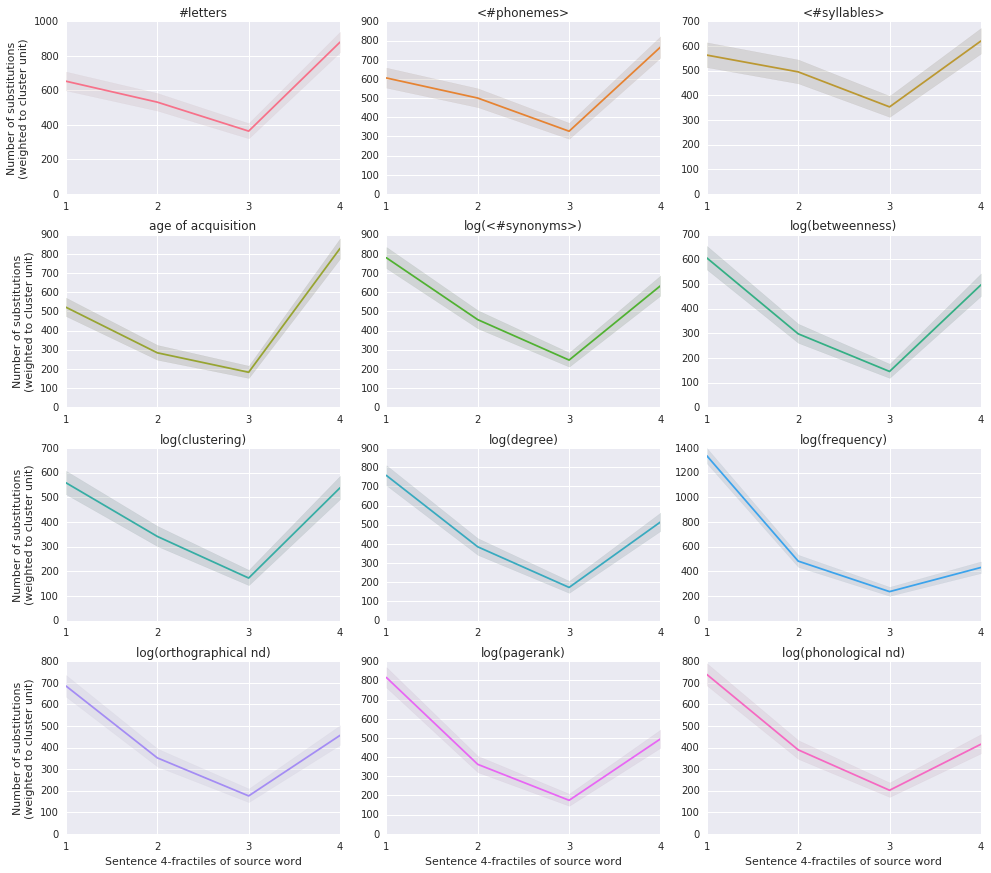

In [19]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

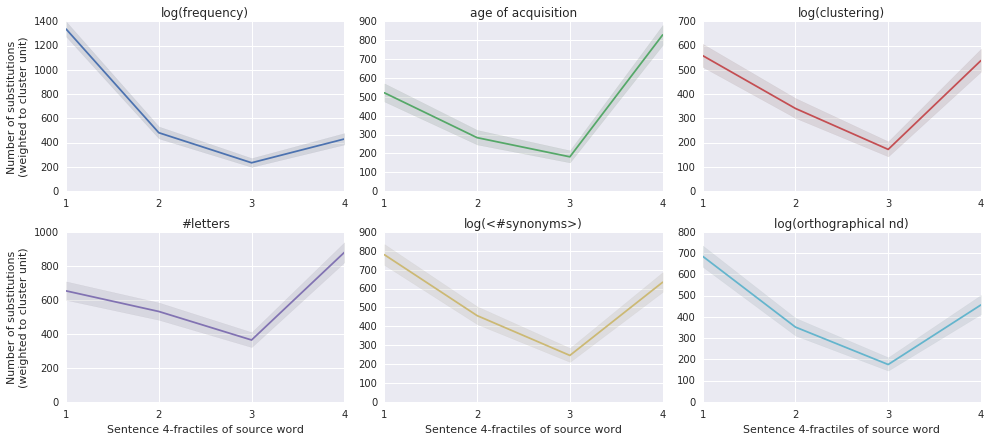

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)